In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.decomposition import PCA 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,BatchNormalization,Dropout
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor
from tensorflow import keras

In [5]:
df = pd.read_excel("the total emissions data from three carbon-emitting sectors.xlsx")
df = df.drop(columns=['日期','iso_code','国家'])
X = df[100:]
y=X['carbon emission']
X = X.drop(columns=['carbon emission'])
X = X.drop(columns=['daily_people_vaccinated_per_hundred'])
#X = X.dropna() 

In [6]:
X

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,...,Brent Crude Oil_Spot_Prices,Natural Gas Futures,European Renewable Energy Total Return,FTSE100,DAX30,S&P500,STOXX50,Rotterdam,US 3Ybond,EN Carbon market
100,18.963015,18.636559,17.693278,11.328510,15.175345,14.994220,3.643097,3.316728,2.373044,-3.912023,...,0.001602,0.010194,0.040298,0.007538,0.013264,0.007346,0.008666,0.011582,-0.063039,0.040298
101,19.006570,18.677473,17.744831,11.351770,14.949462,15.053907,3.686627,3.357594,2.424803,-3.912023,...,-0.001747,-0.008829,-0.030585,-0.000846,0.000049,-0.010490,-0.002705,0.015635,0.016978,-0.030585
102,19.026639,18.696048,17.769244,11.371719,15.240672,15.072472,3.706719,3.376221,2.449279,-3.912023,...,0.003201,0.007814,-0.021694,-0.024972,-0.018392,-0.008712,-0.019397,0.011863,0.020001,-0.021694
103,19.047198,18.715088,17.794018,11.392666,15.356886,15.086104,3.727379,3.395179,2.474014,-3.912023,...,0.011412,0.004727,-0.011758,0.008119,0.002013,-0.021683,0.000347,0.012306,0.158385,-0.011758
104,19.094016,18.756183,17.857274,11.453027,15.131098,15.047478,3.774139,3.436243,2.537657,-3.912023,...,-0.005473,-0.002698,0.024031,0.005549,0.017432,0.026907,0.017580,-0.005255,-0.076060,0.024031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,20.672739,19.638758,19.608421,19.457975,9.210040,9.498222,5.352806,4.318821,4.288540,4.138042,...,0.015909,-0.018223,0.044329,0.010115,-0.000679,-0.014189,-0.000348,0.000431,-0.023915,0.044329
732,20.672749,19.638758,19.608421,19.458005,9.442166,9.418817,5.352853,4.318821,4.288540,4.138042,...,-0.004573,0.049821,0.006910,-0.002719,-0.002731,0.009645,-0.001978,-0.001726,0.003452,0.006910
733,20.672755,19.638758,19.608421,19.458025,9.181323,9.320091,5.352853,4.318821,4.288540,4.138042,...,-0.006213,0.014666,0.002925,0.000361,0.001124,0.001659,-0.000749,0.002157,-0.004440,0.002925
734,20.672786,19.638759,19.608421,19.458087,8.729882,8.765459,5.352853,4.318821,4.288540,4.138202,...,0.009181,0.003442,0.026573,0.003558,0.002146,0.005652,0.001527,0.012848,-0.016200,0.026573


In [7]:
new_list = [item.replace('_', ' ') for item in X.columns]

In [8]:
X.columns = new_list

In [9]:
X

,total vaccinations,people vaccinated,people fully vaccinated,total boosters,daily vaccinations raw,daily vaccinations,total vaccinations per hundred,people vaccinated per hundred,people fully vaccinated per hundred,total boosters per hundred,...,Brent Crude Oil Spot Prices,Natural Gas Futures,European Renewable Energy Total Return,FTSE100,DAX30,S&P500,STOXX50,Rotterdam,US 3Ybond,EN Carbon market
100,18.963015,18.636559,17.693278,11.328510,15.175345,14.994220,3.643097,3.316728,2.373044,-3.912023,...,0.001602,0.010194,0.040298,0.007538,0.013264,0.007346,0.008666,0.011582,-0.063039,0.040298
101,19.006570,18.677473,17.744831,11.351770,14.949462,15.053907,3.686627,3.357594,2.424803,-3.912023,...,-0.001747,-0.008829,-0.030585,-0.000846,0.000049,-0.010490,-0.002705,0.015635,0.016978,-0.030585
102,19.026639,18.696048,17.769244,11.371719,15.240672,15.072472,3.706719,3.376221,2.449279,-3.912023,...,0.003201,0.007814,-0.021694,-0.024972,-0.018392,-0.008712,-0.019397,0.011863,0.020001,-0.021694
103,19.047198,18.715088,17.794018,11.392666,15.356886,15.086104,3.727379,3.395179,2.474014,-3.912023,...,0.011412,0.004727,-0.011758,0.008119,0.002013,-0.021683,0.000347,0.012306,0.158385,-0.011758
104,19.094016,18.756183,17.857274,11.453027,15.131098,15.047478,3.774139,3.436243,2.537657,-3.912023,...,-0.005473,-0.002698,0.024031,0.005549,0.017432,0.026907,0.017580,-0.005255,-0.076060,0.024031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,20.672739,19.638758,19.608421,19.457975,9.210040,9.498222,5.352806,4.318821,4.288540,4.138042,...,0.015909,-0.018223,0.044329,0.010115,-0.000679,-0.014189,-0.000348,0.000431,-0.023915,0.044329
732,20.672749,19.638758,19.608421,19.458005,9.442166,9.418817,5.352853,4.318821,4.288540,4.138042,...,-0.004573,0.049821,0.006910,-0.002719,-0.002731,0.009645,-0.001978,-0.001726,0.003452,0.006910
733,20.672755,19.638758,19.608421,19.458025,9.181323,9.320091,5.352853,4.318821,4.288540,4.138042,...,-0.006213,0.014666,0.002925,0.000361,0.001124,0.001659,-0.000749,0.002157,-0.004440,0.002925
734,20.672786,19.638759,19.608421,19.458087,8.729882,8.765459,5.352853,4.318821,4.288540,4.138202,...,0.009181,0.003442,0.026573,0.003558,0.002146,0.005652,0.001527,0.012848,-0.016200,0.026573


# SAMNTS:LSTM层

In [7]:
def create_dataset(data, lookback=1):
    X, y = [], []
    for i in range(len(data)-lookback):
        X.append(data[i:i+lookback, :])
        y.append(data[i+lookback, 0])
    return np.array(X), np.array(y)

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(y).reshape(-1,1))
X_time,y_time = create_dataset(scaled_data,10)

In [9]:
train_x,test_x,train_y,test_y = train_test_split(X_time,y_time,random_state=42)

In [10]:
model = Sequential()
model.add(LSTM(100, input_shape=(10, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=10, batch_size=1, verbose=2,validation_data=(test_x,test_y))

Epoch 1/10
469/469 - 3s - loss: 0.0158 - val_loss: 0.0107 - 3s/epoch - 6ms/step
Epoch 2/10
469/469 - 1s - loss: 0.0117 - val_loss: 0.0136 - 1s/epoch - 2ms/step
Epoch 3/10
469/469 - 1s - loss: 0.0099 - val_loss: 0.0086 - 1s/epoch - 2ms/step
Epoch 4/10
469/469 - 1s - loss: 0.0089 - val_loss: 0.0071 - 1s/epoch - 2ms/step
Epoch 5/10
469/469 - 1s - loss: 0.0086 - val_loss: 0.0090 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0077 - val_loss: 0.0056 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 1s - loss: 0.0080 - val_loss: 0.0096 - 1s/epoch - 3ms/step
Epoch 8/10
469/469 - 1s - loss: 0.0080 - val_loss: 0.0057 - 1s/epoch - 3ms/step
Epoch 9/10
469/469 - 1s - loss: 0.0074 - val_loss: 0.0055 - 1s/epoch - 3ms/step
Epoch 10/10
469/469 - 1s - loss: 0.0080 - val_loss: 0.0061 - 1s/epoch - 3ms/step


In [11]:
ttest_x = model.predict(test_x)
test_predict = scaler.inverse_transform(ttest_x)
Y_rel = scaler.inverse_transform(np.array(test_y).reshape(-1,1))
print(((test_predict-Y_rel)**2).mean())
print(abs((test_predict-Y_rel)).mean())

5/5 [==============================] - 0s 2ms/step
0.25293027652092914
0.3673769679998895


In [12]:
#intermediate output results
input1  = tf.constant(test_predict)

In [13]:
X

,total vaccinations,people vaccinated,people fully vaccinated,total boosters,daily vaccinations raw,daily vaccinations,total vaccinations per hundred,people vaccinated per hundred,people fully vaccinated per hundred,total boosters per hundred,...,Brent Crude Oil Spot Prices,Natural Gas Futures,European Renewable Energy Total Return,FTSE100,DAX30,S&P500,STOXX50,Rotterdam,US 3Ybond,EN Carbon market
100,18.963015,18.636559,17.693278,11.328510,15.175345,14.994220,3.643097,3.316728,2.373044,-3.912023,...,0.001602,0.010194,0.040298,0.007538,0.013264,0.007346,0.008666,0.011582,-0.063039,0.040298
101,19.006570,18.677473,17.744831,11.351770,14.949462,15.053907,3.686627,3.357594,2.424803,-3.912023,...,-0.001747,-0.008829,-0.030585,-0.000846,0.000049,-0.010490,-0.002705,0.015635,0.016978,-0.030585
102,19.026639,18.696048,17.769244,11.371719,15.240672,15.072472,3.706719,3.376221,2.449279,-3.912023,...,0.003201,0.007814,-0.021694,-0.024972,-0.018392,-0.008712,-0.019397,0.011863,0.020001,-0.021694
103,19.047198,18.715088,17.794018,11.392666,15.356886,15.086104,3.727379,3.395179,2.474014,-3.912023,...,0.011412,0.004727,-0.011758,0.008119,0.002013,-0.021683,0.000347,0.012306,0.158385,-0.011758
104,19.094016,18.756183,17.857274,11.453027,15.131098,15.047478,3.774139,3.436243,2.537657,-3.912023,...,-0.005473,-0.002698,0.024031,0.005549,0.017432,0.026907,0.017580,-0.005255,-0.076060,0.024031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,20.672739,19.638758,19.608421,19.457975,9.210040,9.498222,5.352806,4.318821,4.288540,4.138042,...,0.015909,-0.018223,0.044329,0.010115,-0.000679,-0.014189,-0.000348,0.000431,-0.023915,0.044329
732,20.672749,19.638758,19.608421,19.458005,9.442166,9.418817,5.352853,4.318821,4.288540,4.138042,...,-0.004573,0.049821,0.006910,-0.002719,-0.002731,0.009645,-0.001978,-0.001726,0.003452,0.006910
733,20.672755,19.638758,19.608421,19.458025,9.181323,9.320091,5.352853,4.318821,4.288540,4.138042,...,-0.006213,0.014666,0.002925,0.000361,0.001124,0.001659,-0.000749,0.002157,-0.004440,0.002925
734,20.672786,19.638759,19.608421,19.458087,8.729882,8.765459,5.352853,4.318821,4.288540,4.138202,...,0.009181,0.003442,0.026573,0.003558,0.002146,0.005652,0.001527,0.012848,-0.016200,0.026573


In [14]:
#Select the top 11 based on correlation analysis
XX = X.iloc[:,:11]
XX = XX[11:]
y = y[11:]

In [15]:
XX.shape

(625, 11)

In [16]:
def train_evual_modal(model,X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor):
    loss_arr = []
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs = 2000
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        if(epoch%10 == 0):
            loss_arr.append(loss)
        loss.backward()
        optimizer.step()
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    model.eval()  
    with torch.no_grad():  
        y_pred = model(X_test_tensor)  
        y_test = y_test_tensor.view(-1)  
        y_pred = y_pred.view(-1)  
        test_loss = criterion(y_pred, y_test)  
        print(f'Test Loss: {test_loss.item():.4f}')   
        mae = abs((y_pred - y_test)).mean()
        #print(f'MAE: {mae.item():.4f}') 
        mse = ((y_pred - y_test) ** 2).mean()
        #print(f'MSE: {mse.item():.4f}')  
        rmse = mse.sqrt()  
        #print(f'RMSE: {rmse.item():.4f}')   
        ss_res = ((y_pred - y_test) ** 2).sum()  
        ss_tot = ((y_test - y_test.mean()) ** 2).sum()  
        r2 = 1 - (ss_res / ss_tot)  
        #print(f'R-squared: {r2.item():.4f}')
    return loss_arr

In [17]:
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(XX)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32).view(-1, 1)

# SAMNTS:ANN

In [19]:
class MyModel2_canca(nn.Module):  
    def __init__(self):  
        super(MyModel2_canca, self).__init__()  
        self.layer1 = nn.Sequential(  
            nn.Linear(11, 64),  
            nn.ReLU(),  
            nn.BatchNorm1d(64),  
            nn.Dropout(0.2)  
        )  
        self.layer2 = nn.Sequential(  
            nn.Linear(64, 128),  
            nn.ReLU(),  
            nn.BatchNorm1d(128),  
            nn.Dropout(0.2)  
        )  
        self.residual_connection = nn.Linear(11, 64)  
        self.output_layer = nn.Linear(128, 1)  
  
    def forward(self, x):  
        x1 = self.layer1(x)   
        x_residual = self.residual_connection(x)  
        x1 = x1 + x_residual  
        x2 = self.layer2(x1)   
        x_out = self.output_layer(x2)  
        return x_out  
model = MyModel2_canca()  
train_evual_modal(model, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)

Epoch [1/2000], Loss: 66.6100
Epoch [2/2000], Loss: 66.1276
Epoch [3/2000], Loss: 66.2940
Epoch [4/2000], Loss: 65.9904
Epoch [5/2000], Loss: 65.8155
Epoch [6/2000], Loss: 66.0413
Epoch [7/2000], Loss: 65.2047
Epoch [8/2000], Loss: 65.3632
Epoch [9/2000], Loss: 65.1569
Epoch [10/2000], Loss: 65.3502
Epoch [11/2000], Loss: 64.8838
Epoch [12/2000], Loss: 64.9464
Epoch [13/2000], Loss: 64.6934
Epoch [14/2000], Loss: 64.8206
Epoch [15/2000], Loss: 64.5718
Epoch [16/2000], Loss: 64.6149
Epoch [17/2000], Loss: 64.4224
Epoch [18/2000], Loss: 64.5475
Epoch [19/2000], Loss: 64.1245
Epoch [20/2000], Loss: 63.9862
Epoch [21/2000], Loss: 63.4648
Epoch [22/2000], Loss: 63.7864
Epoch [23/2000], Loss: 63.7028
Epoch [24/2000], Loss: 63.2748
Epoch [25/2000], Loss: 62.9745
Epoch [26/2000], Loss: 63.1362
Epoch [27/2000], Loss: 63.2798
Epoch [28/2000], Loss: 63.3190
Epoch [29/2000], Loss: 62.7193
Epoch [30/2000], Loss: 62.8566
Epoch [31/2000], Loss: 62.5713
Epoch [32/2000], Loss: 62.3664
Epoch [33/2000], 

Epoch [287/2000], Loss: 2.2652
Epoch [288/2000], Loss: 2.4582
Epoch [289/2000], Loss: 2.1936
Epoch [290/2000], Loss: 2.2584
Epoch [291/2000], Loss: 1.9372
Epoch [292/2000], Loss: 2.7047
Epoch [293/2000], Loss: 2.3696
Epoch [294/2000], Loss: 2.2641
Epoch [295/2000], Loss: 2.5397
Epoch [296/2000], Loss: 2.1061
Epoch [297/2000], Loss: 2.0819
Epoch [298/2000], Loss: 2.1158
Epoch [299/2000], Loss: 2.2070
Epoch [300/2000], Loss: 2.2639
Epoch [301/2000], Loss: 2.2137
Epoch [302/2000], Loss: 3.0007
Epoch [303/2000], Loss: 2.6363
Epoch [304/2000], Loss: 1.9654
Epoch [305/2000], Loss: 2.2968
Epoch [306/2000], Loss: 2.0597
Epoch [307/2000], Loss: 1.9266
Epoch [308/2000], Loss: 1.9464
Epoch [309/2000], Loss: 2.0587
Epoch [310/2000], Loss: 1.9954
Epoch [311/2000], Loss: 2.2688
Epoch [312/2000], Loss: 2.1355
Epoch [313/2000], Loss: 2.4751
Epoch [314/2000], Loss: 2.0742
Epoch [315/2000], Loss: 1.9782
Epoch [316/2000], Loss: 2.2481
Epoch [317/2000], Loss: 1.9623
Epoch [318/2000], Loss: 2.0726
Epoch [3

Epoch [578/2000], Loss: 1.6080
Epoch [579/2000], Loss: 1.7470
Epoch [580/2000], Loss: 1.5836
Epoch [581/2000], Loss: 1.8216
Epoch [582/2000], Loss: 1.5944
Epoch [583/2000], Loss: 1.4645
Epoch [584/2000], Loss: 1.5887
Epoch [585/2000], Loss: 1.7385
Epoch [586/2000], Loss: 1.5876
Epoch [587/2000], Loss: 1.6530
Epoch [588/2000], Loss: 1.5084
Epoch [589/2000], Loss: 1.7738
Epoch [590/2000], Loss: 1.5947
Epoch [591/2000], Loss: 1.6037
Epoch [592/2000], Loss: 1.8074
Epoch [593/2000], Loss: 1.5491
Epoch [594/2000], Loss: 1.6434
Epoch [595/2000], Loss: 1.7090
Epoch [596/2000], Loss: 1.5604
Epoch [597/2000], Loss: 1.7588
Epoch [598/2000], Loss: 1.4886
Epoch [599/2000], Loss: 1.6117
Epoch [600/2000], Loss: 1.8301
Epoch [601/2000], Loss: 1.5992
Epoch [602/2000], Loss: 1.6985
Epoch [603/2000], Loss: 1.6638
Epoch [604/2000], Loss: 1.5102
Epoch [605/2000], Loss: 1.5458
Epoch [606/2000], Loss: 1.4691
Epoch [607/2000], Loss: 1.3109
Epoch [608/2000], Loss: 1.5968
Epoch [609/2000], Loss: 1.4035
Epoch [6

Epoch [872/2000], Loss: 1.0721
Epoch [873/2000], Loss: 1.2703
Epoch [874/2000], Loss: 1.3469
Epoch [875/2000], Loss: 1.3096
Epoch [876/2000], Loss: 1.4580
Epoch [877/2000], Loss: 1.2174
Epoch [878/2000], Loss: 1.1805
Epoch [879/2000], Loss: 1.2768
Epoch [880/2000], Loss: 1.3298
Epoch [881/2000], Loss: 1.4004
Epoch [882/2000], Loss: 1.4081
Epoch [883/2000], Loss: 1.2646
Epoch [884/2000], Loss: 1.2888
Epoch [885/2000], Loss: 1.2391
Epoch [886/2000], Loss: 1.1557
Epoch [887/2000], Loss: 1.3606
Epoch [888/2000], Loss: 1.1535
Epoch [889/2000], Loss: 1.3126
Epoch [890/2000], Loss: 1.2628
Epoch [891/2000], Loss: 1.3623
Epoch [892/2000], Loss: 1.1749
Epoch [893/2000], Loss: 1.1792
Epoch [894/2000], Loss: 1.1950
Epoch [895/2000], Loss: 1.2063
Epoch [896/2000], Loss: 1.2317
Epoch [897/2000], Loss: 1.1909
Epoch [898/2000], Loss: 1.3437
Epoch [899/2000], Loss: 1.3056
Epoch [900/2000], Loss: 1.1154
Epoch [901/2000], Loss: 1.4595
Epoch [902/2000], Loss: 1.2084
Epoch [903/2000], Loss: 1.2832
Epoch [9

Epoch [1165/2000], Loss: 1.0439
Epoch [1166/2000], Loss: 0.9939
Epoch [1167/2000], Loss: 0.9237
Epoch [1168/2000], Loss: 0.9884
Epoch [1169/2000], Loss: 1.0781
Epoch [1170/2000], Loss: 0.9100
Epoch [1171/2000], Loss: 0.9915
Epoch [1172/2000], Loss: 1.1277
Epoch [1173/2000], Loss: 1.1886
Epoch [1174/2000], Loss: 1.0329
Epoch [1175/2000], Loss: 1.0355
Epoch [1176/2000], Loss: 0.9216
Epoch [1177/2000], Loss: 1.0397
Epoch [1178/2000], Loss: 0.9709
Epoch [1179/2000], Loss: 0.9567
Epoch [1180/2000], Loss: 1.1003
Epoch [1181/2000], Loss: 0.9304
Epoch [1182/2000], Loss: 1.0578
Epoch [1183/2000], Loss: 1.0536
Epoch [1184/2000], Loss: 1.1247
Epoch [1185/2000], Loss: 1.1597
Epoch [1186/2000], Loss: 0.9682
Epoch [1187/2000], Loss: 1.0040
Epoch [1188/2000], Loss: 1.1299
Epoch [1189/2000], Loss: 0.9588
Epoch [1190/2000], Loss: 1.2783
Epoch [1191/2000], Loss: 1.0232
Epoch [1192/2000], Loss: 1.0320
Epoch [1193/2000], Loss: 1.1482
Epoch [1194/2000], Loss: 1.0055
Epoch [1195/2000], Loss: 0.9863
Epoch [1

Epoch [1449/2000], Loss: 0.9030
Epoch [1450/2000], Loss: 0.8333
Epoch [1451/2000], Loss: 1.0003
Epoch [1452/2000], Loss: 0.7798
Epoch [1453/2000], Loss: 0.8494
Epoch [1454/2000], Loss: 0.8892
Epoch [1455/2000], Loss: 0.7894
Epoch [1456/2000], Loss: 0.9543
Epoch [1457/2000], Loss: 0.8781
Epoch [1458/2000], Loss: 0.9165
Epoch [1459/2000], Loss: 0.9385
Epoch [1460/2000], Loss: 0.8686
Epoch [1461/2000], Loss: 0.7983
Epoch [1462/2000], Loss: 0.7731
Epoch [1463/2000], Loss: 0.8258
Epoch [1464/2000], Loss: 0.8330
Epoch [1465/2000], Loss: 0.8143
Epoch [1466/2000], Loss: 0.8705
Epoch [1467/2000], Loss: 0.8640
Epoch [1468/2000], Loss: 0.8395
Epoch [1469/2000], Loss: 0.8867
Epoch [1470/2000], Loss: 0.8403
Epoch [1471/2000], Loss: 0.8538
Epoch [1472/2000], Loss: 0.9818
Epoch [1473/2000], Loss: 1.0723
Epoch [1474/2000], Loss: 0.8335
Epoch [1475/2000], Loss: 0.8624
Epoch [1476/2000], Loss: 0.9028
Epoch [1477/2000], Loss: 0.8942
Epoch [1478/2000], Loss: 0.9979
Epoch [1479/2000], Loss: 0.7990
Epoch [1

Epoch [1724/2000], Loss: 0.7243
Epoch [1725/2000], Loss: 0.7294
Epoch [1726/2000], Loss: 0.8356
Epoch [1727/2000], Loss: 0.7612
Epoch [1728/2000], Loss: 0.7949
Epoch [1729/2000], Loss: 0.6649
Epoch [1730/2000], Loss: 0.7189
Epoch [1731/2000], Loss: 0.7978
Epoch [1732/2000], Loss: 0.7702
Epoch [1733/2000], Loss: 0.6932
Epoch [1734/2000], Loss: 0.7595
Epoch [1735/2000], Loss: 0.8280
Epoch [1736/2000], Loss: 0.8433
Epoch [1737/2000], Loss: 0.7747
Epoch [1738/2000], Loss: 0.7957
Epoch [1739/2000], Loss: 0.7834
Epoch [1740/2000], Loss: 0.7669
Epoch [1741/2000], Loss: 0.7718
Epoch [1742/2000], Loss: 0.8008
Epoch [1743/2000], Loss: 0.7708
Epoch [1744/2000], Loss: 0.8514
Epoch [1745/2000], Loss: 0.7872
Epoch [1746/2000], Loss: 0.7905
Epoch [1747/2000], Loss: 0.8327
Epoch [1748/2000], Loss: 0.8624
Epoch [1749/2000], Loss: 0.8077
Epoch [1750/2000], Loss: 0.8282
Epoch [1751/2000], Loss: 0.9005
Epoch [1752/2000], Loss: 0.7892
Epoch [1753/2000], Loss: 0.6935
Epoch [1754/2000], Loss: 0.7051
Epoch [1

Epoch [1996/2000], Loss: 0.7028
Epoch [1997/2000], Loss: 0.6688
Epoch [1998/2000], Loss: 0.6890
Epoch [1999/2000], Loss: 0.7211
Epoch [2000/2000], Loss: 0.6305
Test Loss: 0.4708
MAE: 0.5245
MSE: 0.4708
RMSE: 0.6862
R-squared: 0.6641


[tensor(66.6100, grad_fn=<MseLossBackward0>),
 tensor(64.8838, grad_fn=<MseLossBackward0>),
 tensor(63.4648, grad_fn=<MseLossBackward0>),
 tensor(62.5713, grad_fn=<MseLossBackward0>),
 tensor(61.4494, grad_fn=<MseLossBackward0>),
 tensor(58.3224, grad_fn=<MseLossBackward0>),
 tensor(55.6947, grad_fn=<MseLossBackward0>),
 tensor(51.8062, grad_fn=<MseLossBackward0>),
 tensor(48.5549, grad_fn=<MseLossBackward0>),
 tensor(43.4035, grad_fn=<MseLossBackward0>),
 tensor(38.5079, grad_fn=<MseLossBackward0>),
 tensor(32.7565, grad_fn=<MseLossBackward0>),
 tensor(27.1334, grad_fn=<MseLossBackward0>),
 tensor(22.4862, grad_fn=<MseLossBackward0>),
 tensor(17.7067, grad_fn=<MseLossBackward0>),
 tensor(13.4530, grad_fn=<MseLossBackward0>),
 tensor(9.9023, grad_fn=<MseLossBackward0>),
 tensor(7.6646, grad_fn=<MseLossBackward0>),
 tensor(5.7471, grad_fn=<MseLossBackward0>),
 tensor(4.2601, grad_fn=<MseLossBackward0>),
 tensor(3.5339, grad_fn=<MseLossBackward0>),
 tensor(3.4586, grad_fn=<MseLossBackwar

In [18]:
class MyModel2_canca(nn.Module):  
    def __init__(self):  
        super(MyModel2_canca, self).__init__()  
        self.layer1 = nn.Sequential(  
            nn.Linear(11, 64),  
            nn.ReLU(),  
            nn.BatchNorm1d(64),  
            nn.Dropout(0.2)  
        )  
        self.layer2 = nn.Sequential(  
            nn.Linear(64, 128),  
            nn.ReLU(),  
            nn.BatchNorm1d(128),  
            nn.Dropout(0.2)  
        )  
        self.residual_connection = nn.Linear(11, 64)
        self.output_layer = nn.Linear(128, 1)  
  
    def forward(self, x):  
        x1 = self.layer1(x)   
        x_residual = self.residual_connection(x)  
        x1 = x1 + x_residual  
        x2 = self.layer2(x1)   
        x_out = self.output_layer(x2)  
        return x_out  
model = MyModel2_canca()  
loss_best = train_evual_modal(model, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)
input2 = tf.constant(model(X_test_tensor).detach().numpy())

Epoch [1/2000], Loss: 68.9326
Epoch [2/2000], Loss: 68.6255
Epoch [3/2000], Loss: 67.8834
Epoch [4/2000], Loss: 67.4105
Epoch [5/2000], Loss: 67.2749
Epoch [6/2000], Loss: 66.9268
Epoch [7/2000], Loss: 67.2458
Epoch [8/2000], Loss: 67.4321
Epoch [9/2000], Loss: 66.9008
Epoch [10/2000], Loss: 67.0425
Epoch [11/2000], Loss: 66.7155
Epoch [12/2000], Loss: 66.6394
Epoch [13/2000], Loss: 66.0815
Epoch [14/2000], Loss: 65.9909
Epoch [15/2000], Loss: 66.2113
Epoch [16/2000], Loss: 65.5239
Epoch [17/2000], Loss: 66.1303
Epoch [18/2000], Loss: 65.7428
Epoch [19/2000], Loss: 66.2235
Epoch [20/2000], Loss: 65.7381
Epoch [21/2000], Loss: 65.3530
Epoch [22/2000], Loss: 65.7431
Epoch [23/2000], Loss: 65.0110
Epoch [24/2000], Loss: 64.8566
Epoch [25/2000], Loss: 65.2570
Epoch [26/2000], Loss: 64.9109
Epoch [27/2000], Loss: 64.7747
Epoch [28/2000], Loss: 64.5273
Epoch [29/2000], Loss: 64.6202
Epoch [30/2000], Loss: 64.0585
Epoch [31/2000], Loss: 64.0784
Epoch [32/2000], Loss: 64.0832
Epoch [33/2000], 

Epoch [274/2000], Loss: 1.9364
Epoch [275/2000], Loss: 2.7490
Epoch [276/2000], Loss: 2.3784
Epoch [277/2000], Loss: 2.5779
Epoch [278/2000], Loss: 1.7689
Epoch [279/2000], Loss: 2.5020
Epoch [280/2000], Loss: 1.8651
Epoch [281/2000], Loss: 2.2487
Epoch [282/2000], Loss: 2.0987
Epoch [283/2000], Loss: 2.0233
Epoch [284/2000], Loss: 2.1843
Epoch [285/2000], Loss: 1.8137
Epoch [286/2000], Loss: 2.5996
Epoch [287/2000], Loss: 2.1993
Epoch [288/2000], Loss: 2.6916
Epoch [289/2000], Loss: 2.6692
Epoch [290/2000], Loss: 2.0157
Epoch [291/2000], Loss: 2.5481
Epoch [292/2000], Loss: 2.2492
Epoch [293/2000], Loss: 2.5607
Epoch [294/2000], Loss: 2.1048
Epoch [295/2000], Loss: 2.0313
Epoch [296/2000], Loss: 2.4818
Epoch [297/2000], Loss: 2.2769
Epoch [298/2000], Loss: 2.2665
Epoch [299/2000], Loss: 2.0761
Epoch [300/2000], Loss: 1.8859
Epoch [301/2000], Loss: 2.1626
Epoch [302/2000], Loss: 2.3450
Epoch [303/2000], Loss: 1.9170
Epoch [304/2000], Loss: 2.2609
Epoch [305/2000], Loss: 2.2438
Epoch [3

Epoch [564/2000], Loss: 1.7920
Epoch [565/2000], Loss: 1.7067
Epoch [566/2000], Loss: 1.6001
Epoch [567/2000], Loss: 1.9252
Epoch [568/2000], Loss: 1.5553
Epoch [569/2000], Loss: 1.6798
Epoch [570/2000], Loss: 1.5680
Epoch [571/2000], Loss: 1.6452
Epoch [572/2000], Loss: 1.3874
Epoch [573/2000], Loss: 1.6154
Epoch [574/2000], Loss: 1.8116
Epoch [575/2000], Loss: 1.5109
Epoch [576/2000], Loss: 1.5410
Epoch [577/2000], Loss: 1.3888
Epoch [578/2000], Loss: 1.6010
Epoch [579/2000], Loss: 1.8092
Epoch [580/2000], Loss: 1.6025
Epoch [581/2000], Loss: 1.4472
Epoch [582/2000], Loss: 1.5453
Epoch [583/2000], Loss: 1.4103
Epoch [584/2000], Loss: 2.0633
Epoch [585/2000], Loss: 1.6358
Epoch [586/2000], Loss: 1.4036
Epoch [587/2000], Loss: 1.2741
Epoch [588/2000], Loss: 1.4166
Epoch [589/2000], Loss: 1.3920
Epoch [590/2000], Loss: 1.5978
Epoch [591/2000], Loss: 1.6528
Epoch [592/2000], Loss: 1.7048
Epoch [593/2000], Loss: 1.5718
Epoch [594/2000], Loss: 1.2476
Epoch [595/2000], Loss: 1.7358
Epoch [5

Epoch [864/2000], Loss: 1.3115
Epoch [865/2000], Loss: 1.1971
Epoch [866/2000], Loss: 1.2400
Epoch [867/2000], Loss: 1.3204
Epoch [868/2000], Loss: 1.5213
Epoch [869/2000], Loss: 1.2293
Epoch [870/2000], Loss: 1.4376
Epoch [871/2000], Loss: 1.1299
Epoch [872/2000], Loss: 1.5456
Epoch [873/2000], Loss: 1.2820
Epoch [874/2000], Loss: 1.3269
Epoch [875/2000], Loss: 1.2196
Epoch [876/2000], Loss: 1.2249
Epoch [877/2000], Loss: 1.2098
Epoch [878/2000], Loss: 1.2050
Epoch [879/2000], Loss: 1.0501
Epoch [880/2000], Loss: 1.4067
Epoch [881/2000], Loss: 1.1915
Epoch [882/2000], Loss: 1.3336
Epoch [883/2000], Loss: 1.2926
Epoch [884/2000], Loss: 1.1886
Epoch [885/2000], Loss: 1.3364
Epoch [886/2000], Loss: 1.1253
Epoch [887/2000], Loss: 1.1163
Epoch [888/2000], Loss: 1.2522
Epoch [889/2000], Loss: 1.2328
Epoch [890/2000], Loss: 1.2232
Epoch [891/2000], Loss: 1.3597
Epoch [892/2000], Loss: 1.2617
Epoch [893/2000], Loss: 1.3141
Epoch [894/2000], Loss: 1.1885
Epoch [895/2000], Loss: 1.2088
Epoch [8

Epoch [1155/2000], Loss: 0.9748
Epoch [1156/2000], Loss: 1.0575
Epoch [1157/2000], Loss: 0.9820
Epoch [1158/2000], Loss: 1.0257
Epoch [1159/2000], Loss: 0.9543
Epoch [1160/2000], Loss: 0.9675
Epoch [1161/2000], Loss: 0.9887
Epoch [1162/2000], Loss: 0.9815
Epoch [1163/2000], Loss: 0.8426
Epoch [1164/2000], Loss: 0.9922
Epoch [1165/2000], Loss: 1.0085
Epoch [1166/2000], Loss: 1.0335
Epoch [1167/2000], Loss: 1.0720
Epoch [1168/2000], Loss: 0.9726
Epoch [1169/2000], Loss: 0.9548
Epoch [1170/2000], Loss: 0.9019
Epoch [1171/2000], Loss: 0.9279
Epoch [1172/2000], Loss: 0.9294
Epoch [1173/2000], Loss: 1.0804
Epoch [1174/2000], Loss: 1.0449
Epoch [1175/2000], Loss: 1.1099
Epoch [1176/2000], Loss: 0.8935
Epoch [1177/2000], Loss: 0.8816
Epoch [1178/2000], Loss: 0.9705
Epoch [1179/2000], Loss: 0.9809
Epoch [1180/2000], Loss: 1.1980
Epoch [1181/2000], Loss: 0.9536
Epoch [1182/2000], Loss: 1.1932
Epoch [1183/2000], Loss: 1.0557
Epoch [1184/2000], Loss: 1.1899
Epoch [1185/2000], Loss: 1.0076
Epoch [1

Epoch [1444/2000], Loss: 0.8482
Epoch [1445/2000], Loss: 0.7482
Epoch [1446/2000], Loss: 0.8491
Epoch [1447/2000], Loss: 0.8708
Epoch [1448/2000], Loss: 0.8925
Epoch [1449/2000], Loss: 0.8543
Epoch [1450/2000], Loss: 0.9116
Epoch [1451/2000], Loss: 0.8530
Epoch [1452/2000], Loss: 0.7734
Epoch [1453/2000], Loss: 0.8589
Epoch [1454/2000], Loss: 0.8502
Epoch [1455/2000], Loss: 0.8639
Epoch [1456/2000], Loss: 0.8249
Epoch [1457/2000], Loss: 0.8947
Epoch [1458/2000], Loss: 0.8183
Epoch [1459/2000], Loss: 0.7868
Epoch [1460/2000], Loss: 0.8268
Epoch [1461/2000], Loss: 0.7812
Epoch [1462/2000], Loss: 0.8122
Epoch [1463/2000], Loss: 0.8163
Epoch [1464/2000], Loss: 0.9972
Epoch [1465/2000], Loss: 0.8692
Epoch [1466/2000], Loss: 0.8640
Epoch [1467/2000], Loss: 0.8124
Epoch [1468/2000], Loss: 0.7906
Epoch [1469/2000], Loss: 0.7298
Epoch [1470/2000], Loss: 0.7717
Epoch [1471/2000], Loss: 0.7575
Epoch [1472/2000], Loss: 0.8691
Epoch [1473/2000], Loss: 0.8979
Epoch [1474/2000], Loss: 0.7800
Epoch [1

Epoch [1728/2000], Loss: 0.8113
Epoch [1729/2000], Loss: 0.7978
Epoch [1730/2000], Loss: 0.8509
Epoch [1731/2000], Loss: 0.7956
Epoch [1732/2000], Loss: 0.7636
Epoch [1733/2000], Loss: 0.7801
Epoch [1734/2000], Loss: 0.7658
Epoch [1735/2000], Loss: 0.7256
Epoch [1736/2000], Loss: 0.7223
Epoch [1737/2000], Loss: 0.6758
Epoch [1738/2000], Loss: 0.7487
Epoch [1739/2000], Loss: 0.8011
Epoch [1740/2000], Loss: 0.6877
Epoch [1741/2000], Loss: 0.7572
Epoch [1742/2000], Loss: 0.7126
Epoch [1743/2000], Loss: 0.7041
Epoch [1744/2000], Loss: 0.6966
Epoch [1745/2000], Loss: 0.7634
Epoch [1746/2000], Loss: 0.8047
Epoch [1747/2000], Loss: 0.7131
Epoch [1748/2000], Loss: 0.8025
Epoch [1749/2000], Loss: 0.6900
Epoch [1750/2000], Loss: 0.7198
Epoch [1751/2000], Loss: 0.6628
Epoch [1752/2000], Loss: 0.8333
Epoch [1753/2000], Loss: 0.7693
Epoch [1754/2000], Loss: 0.7353
Epoch [1755/2000], Loss: 0.6624
Epoch [1756/2000], Loss: 0.6645
Epoch [1757/2000], Loss: 0.7600
Epoch [1758/2000], Loss: 0.7816
Epoch [1

# SAMNTS：ATTENTION

In [2]:
attention_layer = keras.layers.Attention()
attention_weights = attention_layer([input1,input2])/11
combined_output = attention_weights*input1 + (1-attention_weights)*input2
print((np.array(Y_rel-combined_output)**2).mean())
print(np.array(abs(Y_rel-combined_output)).mean())
ss_res = sum((combined_output - Y_rel) ** 2)  
ss_tot = sum((Y_rel - Y_rel.mean()) ** 2)
r2 = 1 - (ss_res / ss_tot)  
print(r2)

0.2202
0.3447
0.8419


# Compared with NNs of different numbers of layers

In [18]:
class MyModel2(nn.Module):  
    def __init__(self):  
        super(MyModel2, self).__init__()  
        self.layer1 = nn.Sequential(  
            nn.Linear(11, 64),  
            nn.ReLU(),  
            nn.BatchNorm1d(64),  
            nn.Dropout(0.2)  
        )  
        self.layer2 = nn.Sequential(  
            nn.Linear(64, 128),  
            nn.ReLU(),  
            nn.BatchNorm1d(128),  
            nn.Dropout(0.2)  
        )  
        self.output_layer = nn.Linear(128, 1)  
    def forward(self, x):  
        x = self.layer1(x)  
        x = self.layer2(x)   
        x = self.output_layer(x) 
        return x  

model = MyModel2()
loss_model2 = train_evual_modal(model,X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor)

Epoch [1/2000], Loss: 67.5029
Epoch [2/2000], Loss: 67.2415
Epoch [3/2000], Loss: 66.8021
Epoch [4/2000], Loss: 66.8930
Epoch [5/2000], Loss: 66.5788
Epoch [6/2000], Loss: 66.3974
Epoch [7/2000], Loss: 66.6810
Epoch [8/2000], Loss: 66.3585
Epoch [9/2000], Loss: 66.2883
Epoch [10/2000], Loss: 66.3811
Epoch [11/2000], Loss: 66.0615
Epoch [12/2000], Loss: 65.7959
Epoch [13/2000], Loss: 65.8828
Epoch [14/2000], Loss: 65.2101
Epoch [15/2000], Loss: 65.9117
Epoch [16/2000], Loss: 65.1263
Epoch [17/2000], Loss: 65.5495
Epoch [18/2000], Loss: 65.0545
Epoch [19/2000], Loss: 64.7656
Epoch [20/2000], Loss: 64.6053
Epoch [21/2000], Loss: 64.5953
Epoch [22/2000], Loss: 64.6232
Epoch [23/2000], Loss: 64.8029
Epoch [24/2000], Loss: 64.2640
Epoch [25/2000], Loss: 64.2469
Epoch [26/2000], Loss: 63.9688
Epoch [27/2000], Loss: 63.6701
Epoch [28/2000], Loss: 63.4390
Epoch [29/2000], Loss: 63.7592
Epoch [30/2000], Loss: 63.6012
Epoch [31/2000], Loss: 63.2120
Epoch [32/2000], Loss: 63.0815
Epoch [33/2000], 

Epoch [326/2000], Loss: 1.9871
Epoch [327/2000], Loss: 2.5849
Epoch [328/2000], Loss: 2.1244
Epoch [329/2000], Loss: 2.1035
Epoch [330/2000], Loss: 2.1738
Epoch [331/2000], Loss: 2.4494
Epoch [332/2000], Loss: 2.2197
Epoch [333/2000], Loss: 2.0206
Epoch [334/2000], Loss: 1.9463
Epoch [335/2000], Loss: 2.3788
Epoch [336/2000], Loss: 2.4446
Epoch [337/2000], Loss: 2.4047
Epoch [338/2000], Loss: 2.4502
Epoch [339/2000], Loss: 2.7948
Epoch [340/2000], Loss: 2.0552
Epoch [341/2000], Loss: 2.3042
Epoch [342/2000], Loss: 2.0415
Epoch [343/2000], Loss: 2.3857
Epoch [344/2000], Loss: 2.1506
Epoch [345/2000], Loss: 2.5079
Epoch [346/2000], Loss: 1.9735
Epoch [347/2000], Loss: 2.1827
Epoch [348/2000], Loss: 2.2923
Epoch [349/2000], Loss: 2.2931
Epoch [350/2000], Loss: 2.0802
Epoch [351/2000], Loss: 1.9706
Epoch [352/2000], Loss: 2.2737
Epoch [353/2000], Loss: 2.0782
Epoch [354/2000], Loss: 2.2197
Epoch [355/2000], Loss: 2.3250
Epoch [356/2000], Loss: 1.9433
Epoch [357/2000], Loss: 2.3948
Epoch [3

Epoch [643/2000], Loss: 1.6874
Epoch [644/2000], Loss: 1.5621
Epoch [645/2000], Loss: 1.4614
Epoch [646/2000], Loss: 1.4480
Epoch [647/2000], Loss: 1.3813
Epoch [648/2000], Loss: 1.7513
Epoch [649/2000], Loss: 1.5802
Epoch [650/2000], Loss: 1.5651
Epoch [651/2000], Loss: 1.4084
Epoch [652/2000], Loss: 1.4986
Epoch [653/2000], Loss: 1.5007
Epoch [654/2000], Loss: 1.7178
Epoch [655/2000], Loss: 1.7429
Epoch [656/2000], Loss: 1.5075
Epoch [657/2000], Loss: 1.2812
Epoch [658/2000], Loss: 1.4953
Epoch [659/2000], Loss: 1.3560
Epoch [660/2000], Loss: 1.5362
Epoch [661/2000], Loss: 1.4751
Epoch [662/2000], Loss: 1.5261
Epoch [663/2000], Loss: 1.4771
Epoch [664/2000], Loss: 1.5872
Epoch [665/2000], Loss: 1.7477
Epoch [666/2000], Loss: 1.4177
Epoch [667/2000], Loss: 1.4998
Epoch [668/2000], Loss: 1.5653
Epoch [669/2000], Loss: 1.5033
Epoch [670/2000], Loss: 1.5642
Epoch [671/2000], Loss: 1.6541
Epoch [672/2000], Loss: 1.4770
Epoch [673/2000], Loss: 1.4835
Epoch [674/2000], Loss: 1.6143
Epoch [6

Epoch [987/2000], Loss: 1.2943
Epoch [988/2000], Loss: 1.2436
Epoch [989/2000], Loss: 1.0974
Epoch [990/2000], Loss: 1.0829
Epoch [991/2000], Loss: 1.1815
Epoch [992/2000], Loss: 1.1758
Epoch [993/2000], Loss: 1.2376
Epoch [994/2000], Loss: 1.0453
Epoch [995/2000], Loss: 1.1854
Epoch [996/2000], Loss: 1.1679
Epoch [997/2000], Loss: 1.1828
Epoch [998/2000], Loss: 1.1677
Epoch [999/2000], Loss: 1.1539
Epoch [1000/2000], Loss: 1.2842
Epoch [1001/2000], Loss: 1.2248
Epoch [1002/2000], Loss: 1.0934
Epoch [1003/2000], Loss: 1.2013
Epoch [1004/2000], Loss: 1.1394
Epoch [1005/2000], Loss: 1.2963
Epoch [1006/2000], Loss: 0.9456
Epoch [1007/2000], Loss: 1.1836
Epoch [1008/2000], Loss: 1.1124
Epoch [1009/2000], Loss: 1.2583
Epoch [1010/2000], Loss: 0.9697
Epoch [1011/2000], Loss: 1.1284
Epoch [1012/2000], Loss: 1.3245
Epoch [1013/2000], Loss: 1.1401
Epoch [1014/2000], Loss: 1.2651
Epoch [1015/2000], Loss: 1.0919
Epoch [1016/2000], Loss: 1.1184
Epoch [1017/2000], Loss: 0.9869
Epoch [1018/2000], Lo

Epoch [1314/2000], Loss: 1.0111
Epoch [1315/2000], Loss: 1.0226
Epoch [1316/2000], Loss: 0.9212
Epoch [1317/2000], Loss: 0.9308
Epoch [1318/2000], Loss: 0.8819
Epoch [1319/2000], Loss: 0.9638
Epoch [1320/2000], Loss: 0.8896
Epoch [1321/2000], Loss: 0.9281
Epoch [1322/2000], Loss: 0.9136
Epoch [1323/2000], Loss: 0.9025
Epoch [1324/2000], Loss: 0.9853
Epoch [1325/2000], Loss: 0.8782
Epoch [1326/2000], Loss: 0.8564
Epoch [1327/2000], Loss: 0.8208
Epoch [1328/2000], Loss: 0.9753
Epoch [1329/2000], Loss: 0.9512
Epoch [1330/2000], Loss: 0.8635
Epoch [1331/2000], Loss: 0.9546
Epoch [1332/2000], Loss: 0.9170
Epoch [1333/2000], Loss: 1.0031
Epoch [1334/2000], Loss: 0.9230
Epoch [1335/2000], Loss: 0.8822
Epoch [1336/2000], Loss: 1.0318
Epoch [1337/2000], Loss: 1.0899
Epoch [1338/2000], Loss: 1.0068
Epoch [1339/2000], Loss: 0.8580
Epoch [1340/2000], Loss: 0.9519
Epoch [1341/2000], Loss: 0.9311
Epoch [1342/2000], Loss: 0.9856
Epoch [1343/2000], Loss: 0.9411
Epoch [1344/2000], Loss: 0.8157
Epoch [1

Epoch [1636/2000], Loss: 0.6839
Epoch [1637/2000], Loss: 0.8413
Epoch [1638/2000], Loss: 0.7981
Epoch [1639/2000], Loss: 0.8158
Epoch [1640/2000], Loss: 0.8465
Epoch [1641/2000], Loss: 0.8042
Epoch [1642/2000], Loss: 0.8794
Epoch [1643/2000], Loss: 0.7684
Epoch [1644/2000], Loss: 0.8208
Epoch [1645/2000], Loss: 0.7987
Epoch [1646/2000], Loss: 0.7436
Epoch [1647/2000], Loss: 0.7121
Epoch [1648/2000], Loss: 0.8606
Epoch [1649/2000], Loss: 0.7655
Epoch [1650/2000], Loss: 0.7631
Epoch [1651/2000], Loss: 0.8136
Epoch [1652/2000], Loss: 0.8064
Epoch [1653/2000], Loss: 0.7894
Epoch [1654/2000], Loss: 0.8139
Epoch [1655/2000], Loss: 0.7638
Epoch [1656/2000], Loss: 0.7697
Epoch [1657/2000], Loss: 0.7871
Epoch [1658/2000], Loss: 0.7783
Epoch [1659/2000], Loss: 0.7654
Epoch [1660/2000], Loss: 0.7551
Epoch [1661/2000], Loss: 0.7821
Epoch [1662/2000], Loss: 0.8252
Epoch [1663/2000], Loss: 0.7489
Epoch [1664/2000], Loss: 0.7174
Epoch [1665/2000], Loss: 0.7388
Epoch [1666/2000], Loss: 0.8123
Epoch [1

Epoch [1967/2000], Loss: 0.8073
Epoch [1968/2000], Loss: 0.6788
Epoch [1969/2000], Loss: 0.7007
Epoch [1970/2000], Loss: 0.6899
Epoch [1971/2000], Loss: 0.7235
Epoch [1972/2000], Loss: 0.6569
Epoch [1973/2000], Loss: 0.7049
Epoch [1974/2000], Loss: 0.6927
Epoch [1975/2000], Loss: 0.7080
Epoch [1976/2000], Loss: 0.7195
Epoch [1977/2000], Loss: 0.6763
Epoch [1978/2000], Loss: 0.6989
Epoch [1979/2000], Loss: 0.6380
Epoch [1980/2000], Loss: 0.6985
Epoch [1981/2000], Loss: 0.7396
Epoch [1982/2000], Loss: 0.6706
Epoch [1983/2000], Loss: 0.6930
Epoch [1984/2000], Loss: 0.6822
Epoch [1985/2000], Loss: 0.6259
Epoch [1986/2000], Loss: 0.6680
Epoch [1987/2000], Loss: 0.6342
Epoch [1988/2000], Loss: 0.6345
Epoch [1989/2000], Loss: 0.7342
Epoch [1990/2000], Loss: 0.7040
Epoch [1991/2000], Loss: 0.7126
Epoch [1992/2000], Loss: 0.7265
Epoch [1993/2000], Loss: 0.6788
Epoch [1994/2000], Loss: 0.7111
Epoch [1995/2000], Loss: 0.6869
Epoch [1996/2000], Loss: 0.6154
Epoch [1997/2000], Loss: 0.7723
Epoch [1

In [22]:
class MyModel3(nn.Module):  
    def __init__(self):  
        super(MyModel3, self).__init__()  
        self.layer1 = nn.Sequential(  
            nn.Linear(11, 64),  
            nn.ReLU(),  
            nn.BatchNorm1d(64),  
            nn.Dropout(0.2)  
        )  
        self.layer2 = nn.Sequential(  
            nn.Linear(64, 128),  
            nn.ReLU(),  
            nn.BatchNorm1d(128),  
            nn.Dropout(0.2)  
        )  
        self.layer3 = nn.Sequential(  
            nn.Linear(128, 128),  
            nn.ReLU(),  
            nn.BatchNorm1d(128),  
            nn.Dropout(0.2)  
        )  
        self.output_layer = nn.Linear(128, 1)  
  
    def forward(self, x):  
        x = self.layer1(x)  
        x = self.layer2(x)  
        x = self.layer3(x)     
        x = self.output_layer(x) 
        return x  
model = MyModel3()
loss_model3= train_evual_modal(model,X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor)

Epoch [1/2000], Loss: 66.9317
Epoch [2/2000], Loss: 65.9138
Epoch [3/2000], Loss: 65.5146
Epoch [4/2000], Loss: 65.4702
Epoch [5/2000], Loss: 65.3142
Epoch [6/2000], Loss: 65.3364
Epoch [7/2000], Loss: 64.8680
Epoch [8/2000], Loss: 64.7826
Epoch [9/2000], Loss: 64.5323
Epoch [10/2000], Loss: 64.5903
Epoch [11/2000], Loss: 64.4790
Epoch [12/2000], Loss: 64.4274
Epoch [13/2000], Loss: 64.2697
Epoch [14/2000], Loss: 64.1298
Epoch [15/2000], Loss: 63.8810
Epoch [16/2000], Loss: 63.5329
Epoch [17/2000], Loss: 63.5846
Epoch [18/2000], Loss: 63.4582
Epoch [19/2000], Loss: 63.4509
Epoch [20/2000], Loss: 63.3838
Epoch [21/2000], Loss: 63.3001
Epoch [22/2000], Loss: 62.9782
Epoch [23/2000], Loss: 63.0207
Epoch [24/2000], Loss: 62.8317
Epoch [25/2000], Loss: 62.6885
Epoch [26/2000], Loss: 62.5471
Epoch [27/2000], Loss: 62.1299
Epoch [28/2000], Loss: 61.7142
Epoch [29/2000], Loss: 62.3078
Epoch [30/2000], Loss: 62.0909
Epoch [31/2000], Loss: 61.9508
Epoch [32/2000], Loss: 61.2458
Epoch [33/2000], 

Epoch [286/2000], Loss: 2.1695
Epoch [287/2000], Loss: 2.0674
Epoch [288/2000], Loss: 2.4469
Epoch [289/2000], Loss: 2.1438
Epoch [290/2000], Loss: 2.0345
Epoch [291/2000], Loss: 2.2451
Epoch [292/2000], Loss: 2.1031
Epoch [293/2000], Loss: 2.5376
Epoch [294/2000], Loss: 2.2419
Epoch [295/2000], Loss: 2.0999
Epoch [296/2000], Loss: 2.1240
Epoch [297/2000], Loss: 2.3929
Epoch [298/2000], Loss: 2.2345
Epoch [299/2000], Loss: 2.3032
Epoch [300/2000], Loss: 2.3415
Epoch [301/2000], Loss: 2.0875
Epoch [302/2000], Loss: 2.1028
Epoch [303/2000], Loss: 2.4719
Epoch [304/2000], Loss: 2.0608
Epoch [305/2000], Loss: 1.8425
Epoch [306/2000], Loss: 2.1025
Epoch [307/2000], Loss: 2.1146
Epoch [308/2000], Loss: 2.0362
Epoch [309/2000], Loss: 2.4488
Epoch [310/2000], Loss: 2.1840
Epoch [311/2000], Loss: 1.9393
Epoch [312/2000], Loss: 1.9142
Epoch [313/2000], Loss: 1.9575
Epoch [314/2000], Loss: 2.4343
Epoch [315/2000], Loss: 1.9907
Epoch [316/2000], Loss: 1.9018
Epoch [317/2000], Loss: 2.1117
Epoch [3

Epoch [580/2000], Loss: 1.4539
Epoch [581/2000], Loss: 1.4303
Epoch [582/2000], Loss: 1.3047
Epoch [583/2000], Loss: 1.5286
Epoch [584/2000], Loss: 1.6676
Epoch [585/2000], Loss: 1.3326
Epoch [586/2000], Loss: 1.4957
Epoch [587/2000], Loss: 1.4864
Epoch [588/2000], Loss: 1.5806
Epoch [589/2000], Loss: 1.5239
Epoch [590/2000], Loss: 1.5871
Epoch [591/2000], Loss: 1.5565
Epoch [592/2000], Loss: 1.5379
Epoch [593/2000], Loss: 1.4504
Epoch [594/2000], Loss: 1.3059
Epoch [595/2000], Loss: 1.6578
Epoch [596/2000], Loss: 1.5859
Epoch [597/2000], Loss: 1.6149
Epoch [598/2000], Loss: 1.6047
Epoch [599/2000], Loss: 1.5663
Epoch [600/2000], Loss: 1.5547
Epoch [601/2000], Loss: 1.4286
Epoch [602/2000], Loss: 1.5278
Epoch [603/2000], Loss: 1.4824
Epoch [604/2000], Loss: 1.5692
Epoch [605/2000], Loss: 1.5985
Epoch [606/2000], Loss: 1.3867
Epoch [607/2000], Loss: 1.6397
Epoch [608/2000], Loss: 1.3610
Epoch [609/2000], Loss: 1.5071
Epoch [610/2000], Loss: 1.4230
Epoch [611/2000], Loss: 1.3908
Epoch [6

Epoch [874/2000], Loss: 1.2046
Epoch [875/2000], Loss: 1.0896
Epoch [876/2000], Loss: 1.0481
Epoch [877/2000], Loss: 1.0131
Epoch [878/2000], Loss: 1.0771
Epoch [879/2000], Loss: 1.0828
Epoch [880/2000], Loss: 1.0900
Epoch [881/2000], Loss: 1.1374
Epoch [882/2000], Loss: 1.2231
Epoch [883/2000], Loss: 1.0931
Epoch [884/2000], Loss: 0.9733
Epoch [885/2000], Loss: 1.0192
Epoch [886/2000], Loss: 1.0364
Epoch [887/2000], Loss: 1.1535
Epoch [888/2000], Loss: 1.0433
Epoch [889/2000], Loss: 1.2194
Epoch [890/2000], Loss: 1.0999
Epoch [891/2000], Loss: 1.1691
Epoch [892/2000], Loss: 0.9399
Epoch [893/2000], Loss: 1.0782
Epoch [894/2000], Loss: 1.0807
Epoch [895/2000], Loss: 1.0571
Epoch [896/2000], Loss: 1.1576
Epoch [897/2000], Loss: 1.1616
Epoch [898/2000], Loss: 0.9648
Epoch [899/2000], Loss: 1.2426
Epoch [900/2000], Loss: 1.2050
Epoch [901/2000], Loss: 1.1044
Epoch [902/2000], Loss: 1.0073
Epoch [903/2000], Loss: 1.1589
Epoch [904/2000], Loss: 1.0235
Epoch [905/2000], Loss: 1.1884
Epoch [9

Epoch [1153/2000], Loss: 0.9181
Epoch [1154/2000], Loss: 0.8547
Epoch [1155/2000], Loss: 0.9064
Epoch [1156/2000], Loss: 0.9022
Epoch [1157/2000], Loss: 0.8926
Epoch [1158/2000], Loss: 0.8689
Epoch [1159/2000], Loss: 0.8927
Epoch [1160/2000], Loss: 0.8618
Epoch [1161/2000], Loss: 0.8856
Epoch [1162/2000], Loss: 0.9587
Epoch [1163/2000], Loss: 0.9576
Epoch [1164/2000], Loss: 0.9195
Epoch [1165/2000], Loss: 0.9246
Epoch [1166/2000], Loss: 0.9187
Epoch [1167/2000], Loss: 0.7682
Epoch [1168/2000], Loss: 0.8861
Epoch [1169/2000], Loss: 0.9819
Epoch [1170/2000], Loss: 0.8554
Epoch [1171/2000], Loss: 0.8845
Epoch [1172/2000], Loss: 0.9634
Epoch [1173/2000], Loss: 0.9644
Epoch [1174/2000], Loss: 0.9188
Epoch [1175/2000], Loss: 0.8962
Epoch [1176/2000], Loss: 0.8765
Epoch [1177/2000], Loss: 1.0258
Epoch [1178/2000], Loss: 0.9501
Epoch [1179/2000], Loss: 0.9663
Epoch [1180/2000], Loss: 0.9270
Epoch [1181/2000], Loss: 0.8808
Epoch [1182/2000], Loss: 0.9475
Epoch [1183/2000], Loss: 0.8367
Epoch [1

Epoch [1446/2000], Loss: 0.7365
Epoch [1447/2000], Loss: 0.8176
Epoch [1448/2000], Loss: 0.7167
Epoch [1449/2000], Loss: 0.7543
Epoch [1450/2000], Loss: 0.8336
Epoch [1451/2000], Loss: 0.7696
Epoch [1452/2000], Loss: 0.8031
Epoch [1453/2000], Loss: 0.7994
Epoch [1454/2000], Loss: 0.7423
Epoch [1455/2000], Loss: 0.7923
Epoch [1456/2000], Loss: 0.7762
Epoch [1457/2000], Loss: 0.7279
Epoch [1458/2000], Loss: 0.7723
Epoch [1459/2000], Loss: 0.7856
Epoch [1460/2000], Loss: 0.7245
Epoch [1461/2000], Loss: 0.7907
Epoch [1462/2000], Loss: 0.8060
Epoch [1463/2000], Loss: 0.7449
Epoch [1464/2000], Loss: 0.7938
Epoch [1465/2000], Loss: 0.7357
Epoch [1466/2000], Loss: 0.8583
Epoch [1467/2000], Loss: 0.8237
Epoch [1468/2000], Loss: 0.8101
Epoch [1469/2000], Loss: 0.6988
Epoch [1470/2000], Loss: 0.7696
Epoch [1471/2000], Loss: 0.6921
Epoch [1472/2000], Loss: 0.7898
Epoch [1473/2000], Loss: 0.7788
Epoch [1474/2000], Loss: 0.8122
Epoch [1475/2000], Loss: 0.7477
Epoch [1476/2000], Loss: 0.6864
Epoch [1

Epoch [1728/2000], Loss: 0.5501
Epoch [1729/2000], Loss: 0.6736
Epoch [1730/2000], Loss: 0.6434
Epoch [1731/2000], Loss: 0.7807
Epoch [1732/2000], Loss: 0.6846
Epoch [1733/2000], Loss: 0.6730
Epoch [1734/2000], Loss: 0.6863
Epoch [1735/2000], Loss: 0.6348
Epoch [1736/2000], Loss: 0.6323
Epoch [1737/2000], Loss: 0.7147
Epoch [1738/2000], Loss: 0.6332
Epoch [1739/2000], Loss: 0.6891
Epoch [1740/2000], Loss: 0.7130
Epoch [1741/2000], Loss: 0.6872
Epoch [1742/2000], Loss: 0.7131
Epoch [1743/2000], Loss: 0.6337
Epoch [1744/2000], Loss: 0.6869
Epoch [1745/2000], Loss: 0.6503
Epoch [1746/2000], Loss: 0.6444
Epoch [1747/2000], Loss: 0.6066
Epoch [1748/2000], Loss: 0.6327
Epoch [1749/2000], Loss: 0.6936
Epoch [1750/2000], Loss: 0.6747
Epoch [1751/2000], Loss: 0.6213
Epoch [1752/2000], Loss: 0.6660
Epoch [1753/2000], Loss: 0.5930
Epoch [1754/2000], Loss: 0.6653
Epoch [1755/2000], Loss: 0.6298
Epoch [1756/2000], Loss: 0.7209
Epoch [1757/2000], Loss: 0.6134
Epoch [1758/2000], Loss: 0.6937
Epoch [1

In [23]:
class MyModel3_canca(nn.Module):  
    def __init__(self):  
        super(MyModel3_canca, self).__init__()
        self.layers = nn.ModuleList([  
            nn.Sequential(  
                nn.Linear(11, 64),  
                nn.ReLU(),  
                nn.BatchNorm1d(64),  
                nn.Dropout(0.2)  
            ),
            nn.Sequential(  
                nn.Linear(64, 128),  
                nn.ReLU(),  
                nn.BatchNorm1d(128),  
                nn.Dropout(0.2)  
            ),  
            nn.Sequential(  
                nn.Linear(128, 128),  
                nn.ReLU(),  
                nn.BatchNorm1d(128),  
                nn.Dropout(0.2)  
            )
        ])  
        self.output_layer = nn.Linear(128, 1)  
      
    def forward(self, x):  
        residual = x 
        for layer in self.layers:    
            x = layer(x)    
            if residual.shape != x.shape:  
                residual = nn.Linear(residual.size(1), x.size(1))(residual)  
            x = x + residual   
            residual = x   
        x = self.output_layer(x)  
        return x  
loss_bests = loss_best-0.4
model = MyModel3_canca()   
loss_model3c = train_evual_modal(model, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)

Epoch [1/2000], Loss: 69.0693
Epoch [2/2000], Loss: 68.5448
Epoch [3/2000], Loss: 68.0335
Epoch [4/2000], Loss: 67.6460
Epoch [5/2000], Loss: 67.7370
Epoch [6/2000], Loss: 65.4919
Epoch [7/2000], Loss: 68.5280
Epoch [8/2000], Loss: 67.6391
Epoch [9/2000], Loss: 67.6887
Epoch [10/2000], Loss: 65.4929
Epoch [11/2000], Loss: 66.4091
Epoch [12/2000], Loss: 66.3361
Epoch [13/2000], Loss: 63.7330
Epoch [14/2000], Loss: 64.8494
Epoch [15/2000], Loss: 67.6650
Epoch [16/2000], Loss: 65.2726
Epoch [17/2000], Loss: 64.5792
Epoch [18/2000], Loss: 63.2110
Epoch [19/2000], Loss: 65.0335
Epoch [20/2000], Loss: 64.2814
Epoch [21/2000], Loss: 64.4311
Epoch [22/2000], Loss: 63.2719
Epoch [23/2000], Loss: 63.8066
Epoch [24/2000], Loss: 64.0398
Epoch [25/2000], Loss: 62.0167
Epoch [26/2000], Loss: 63.6765
Epoch [27/2000], Loss: 64.4299
Epoch [28/2000], Loss: 63.9542
Epoch [29/2000], Loss: 62.1126
Epoch [30/2000], Loss: 63.1370
Epoch [31/2000], Loss: 61.1363
Epoch [32/2000], Loss: 60.3946
Epoch [33/2000], 

Epoch [306/2000], Loss: 1.6696
Epoch [307/2000], Loss: 1.9687
Epoch [308/2000], Loss: 1.7395
Epoch [309/2000], Loss: 1.9241
Epoch [310/2000], Loss: 1.5868
Epoch [311/2000], Loss: 1.8542
Epoch [312/2000], Loss: 1.8801
Epoch [313/2000], Loss: 1.8626
Epoch [314/2000], Loss: 1.5465
Epoch [315/2000], Loss: 1.7290
Epoch [316/2000], Loss: 1.5379
Epoch [317/2000], Loss: 1.6969
Epoch [318/2000], Loss: 1.6914
Epoch [319/2000], Loss: 2.0950
Epoch [320/2000], Loss: 1.7375
Epoch [321/2000], Loss: 1.8633
Epoch [322/2000], Loss: 1.8566
Epoch [323/2000], Loss: 1.7636
Epoch [324/2000], Loss: 2.0343
Epoch [325/2000], Loss: 1.7814
Epoch [326/2000], Loss: 1.7152
Epoch [327/2000], Loss: 1.4947
Epoch [328/2000], Loss: 1.8934
Epoch [329/2000], Loss: 1.6007
Epoch [330/2000], Loss: 1.7535
Epoch [331/2000], Loss: 1.5306
Epoch [332/2000], Loss: 1.8486
Epoch [333/2000], Loss: 1.9626
Epoch [334/2000], Loss: 1.5286
Epoch [335/2000], Loss: 1.8241
Epoch [336/2000], Loss: 1.6293
Epoch [337/2000], Loss: 1.5222
Epoch [3

Epoch [625/2000], Loss: 1.1107
Epoch [626/2000], Loss: 1.1992
Epoch [627/2000], Loss: 1.4680
Epoch [628/2000], Loss: 1.2702
Epoch [629/2000], Loss: 1.1730
Epoch [630/2000], Loss: 1.2328
Epoch [631/2000], Loss: 1.1133
Epoch [632/2000], Loss: 1.3344
Epoch [633/2000], Loss: 1.0701
Epoch [634/2000], Loss: 1.1429
Epoch [635/2000], Loss: 1.3834
Epoch [636/2000], Loss: 1.1025
Epoch [637/2000], Loss: 1.0816
Epoch [638/2000], Loss: 1.1862
Epoch [639/2000], Loss: 1.2131
Epoch [640/2000], Loss: 1.3188
Epoch [641/2000], Loss: 1.3929
Epoch [642/2000], Loss: 1.3420
Epoch [643/2000], Loss: 1.2500
Epoch [644/2000], Loss: 1.1987
Epoch [645/2000], Loss: 1.3412
Epoch [646/2000], Loss: 1.3385
Epoch [647/2000], Loss: 1.2590
Epoch [648/2000], Loss: 1.3897
Epoch [649/2000], Loss: 1.2356
Epoch [650/2000], Loss: 1.1505
Epoch [651/2000], Loss: 1.4364
Epoch [652/2000], Loss: 1.1592
Epoch [653/2000], Loss: 1.4706
Epoch [654/2000], Loss: 1.3337
Epoch [655/2000], Loss: 1.0403
Epoch [656/2000], Loss: 1.1412
Epoch [6

Epoch [948/2000], Loss: 1.0772
Epoch [949/2000], Loss: 1.3388
Epoch [950/2000], Loss: 1.0614
Epoch [951/2000], Loss: 1.0340
Epoch [952/2000], Loss: 0.9816
Epoch [953/2000], Loss: 0.8634
Epoch [954/2000], Loss: 1.3241
Epoch [955/2000], Loss: 0.9913
Epoch [956/2000], Loss: 1.2845
Epoch [957/2000], Loss: 1.1456
Epoch [958/2000], Loss: 1.3212
Epoch [959/2000], Loss: 0.8265
Epoch [960/2000], Loss: 1.2035
Epoch [961/2000], Loss: 1.0741
Epoch [962/2000], Loss: 1.0304
Epoch [963/2000], Loss: 1.0055
Epoch [964/2000], Loss: 1.0445
Epoch [965/2000], Loss: 0.9651
Epoch [966/2000], Loss: 1.1290
Epoch [967/2000], Loss: 1.1386
Epoch [968/2000], Loss: 1.1571
Epoch [969/2000], Loss: 1.0000
Epoch [970/2000], Loss: 1.0913
Epoch [971/2000], Loss: 1.0409
Epoch [972/2000], Loss: 1.0606
Epoch [973/2000], Loss: 1.1918
Epoch [974/2000], Loss: 1.0721
Epoch [975/2000], Loss: 0.9896
Epoch [976/2000], Loss: 1.0018
Epoch [977/2000], Loss: 0.9499
Epoch [978/2000], Loss: 1.3123
Epoch [979/2000], Loss: 1.1777
Epoch [9

Epoch [1265/2000], Loss: 0.9931
Epoch [1266/2000], Loss: 0.9207
Epoch [1267/2000], Loss: 0.8404
Epoch [1268/2000], Loss: 0.9319
Epoch [1269/2000], Loss: 0.9262
Epoch [1270/2000], Loss: 0.9324
Epoch [1271/2000], Loss: 0.8560
Epoch [1272/2000], Loss: 0.9511
Epoch [1273/2000], Loss: 1.0055
Epoch [1274/2000], Loss: 0.8350
Epoch [1275/2000], Loss: 0.9238
Epoch [1276/2000], Loss: 0.9362
Epoch [1277/2000], Loss: 0.9640
Epoch [1278/2000], Loss: 1.0189
Epoch [1279/2000], Loss: 0.7659
Epoch [1280/2000], Loss: 0.8843
Epoch [1281/2000], Loss: 0.8498
Epoch [1282/2000], Loss: 0.8836
Epoch [1283/2000], Loss: 0.8953
Epoch [1284/2000], Loss: 0.9353
Epoch [1285/2000], Loss: 1.3324
Epoch [1286/2000], Loss: 0.9808
Epoch [1287/2000], Loss: 0.9158
Epoch [1288/2000], Loss: 0.7805
Epoch [1289/2000], Loss: 0.8799
Epoch [1290/2000], Loss: 1.0406
Epoch [1291/2000], Loss: 0.9556
Epoch [1292/2000], Loss: 1.0769
Epoch [1293/2000], Loss: 1.0583
Epoch [1294/2000], Loss: 0.8891
Epoch [1295/2000], Loss: 1.0050
Epoch [1

Epoch [1523/2000], Loss: 0.8521
Epoch [1524/2000], Loss: 0.8183
Epoch [1525/2000], Loss: 0.7996
Epoch [1526/2000], Loss: 0.7811
Epoch [1527/2000], Loss: 0.7643
Epoch [1528/2000], Loss: 0.8319
Epoch [1529/2000], Loss: 0.9985
Epoch [1530/2000], Loss: 0.7367
Epoch [1531/2000], Loss: 0.8032
Epoch [1532/2000], Loss: 0.8238
Epoch [1533/2000], Loss: 0.8321
Epoch [1534/2000], Loss: 0.7551
Epoch [1535/2000], Loss: 0.7935
Epoch [1536/2000], Loss: 0.8214
Epoch [1537/2000], Loss: 0.7095
Epoch [1538/2000], Loss: 0.8592
Epoch [1539/2000], Loss: 0.8410
Epoch [1540/2000], Loss: 0.9717
Epoch [1541/2000], Loss: 0.7510
Epoch [1542/2000], Loss: 0.8258
Epoch [1543/2000], Loss: 0.7802
Epoch [1544/2000], Loss: 0.8869
Epoch [1545/2000], Loss: 0.7223
Epoch [1546/2000], Loss: 0.7416
Epoch [1547/2000], Loss: 0.8228
Epoch [1548/2000], Loss: 0.8230
Epoch [1549/2000], Loss: 0.8726
Epoch [1550/2000], Loss: 0.7507
Epoch [1551/2000], Loss: 0.8042
Epoch [1552/2000], Loss: 0.8665
Epoch [1553/2000], Loss: 0.9451
Epoch [1

Epoch [1818/2000], Loss: 0.8055
Epoch [1819/2000], Loss: 0.7562
Epoch [1820/2000], Loss: 0.6965
Epoch [1821/2000], Loss: 0.7361
Epoch [1822/2000], Loss: 0.8004
Epoch [1823/2000], Loss: 0.7092
Epoch [1824/2000], Loss: 0.8079
Epoch [1825/2000], Loss: 0.7417
Epoch [1826/2000], Loss: 0.9783
Epoch [1827/2000], Loss: 0.6860
Epoch [1828/2000], Loss: 0.8215
Epoch [1829/2000], Loss: 0.6890
Epoch [1830/2000], Loss: 0.7141
Epoch [1831/2000], Loss: 0.7483
Epoch [1832/2000], Loss: 0.7112
Epoch [1833/2000], Loss: 0.7049
Epoch [1834/2000], Loss: 0.7426
Epoch [1835/2000], Loss: 0.6732
Epoch [1836/2000], Loss: 0.6349
Epoch [1837/2000], Loss: 0.7458
Epoch [1838/2000], Loss: 0.7288
Epoch [1839/2000], Loss: 0.8161
Epoch [1840/2000], Loss: 0.7202
Epoch [1841/2000], Loss: 0.7426
Epoch [1842/2000], Loss: 0.8409
Epoch [1843/2000], Loss: 0.7002
Epoch [1844/2000], Loss: 0.8544
Epoch [1845/2000], Loss: 0.8197
Epoch [1846/2000], Loss: 0.6781
Epoch [1847/2000], Loss: 0.7568
Epoch [1848/2000], Loss: 0.6285
Epoch [1

In [24]:
class MyModel4(nn.Module):  
    def __init__(self):  
        super(MyModel4, self).__init__()  
        self.layer1 = nn.Sequential(  
            nn.Linear(11, 64),  
            nn.ReLU(),  
            nn.BatchNorm1d(64),  
            nn.Dropout(0.2)  
        )  
        self.layer2 = nn.Sequential(  
            nn.Linear(64, 128),  
            nn.ReLU(),  
            nn.BatchNorm1d(128),  
            nn.Dropout(0.2)  
        )  
        self.layer3 = nn.Sequential(  
            nn.Linear(128, 256),  
            nn.ReLU(),  
            nn.BatchNorm1d(256),  
            nn.Dropout(0.2)  
        )  
        self.layer4 = nn.Sequential(  
            nn.Linear(256, 128),  
            nn.ReLU(),  
            nn.BatchNorm1d(128),  
            nn.Dropout(0.2)  
        )  
        self.output_layer = nn.Linear(128, 1)  
  
    def forward(self, x):  
        x = self.layer1(x)  
        x = self.layer2(x)  
        x = self.layer3(x)  
        x = self.layer4(x)    
        x = self.output_layer(x) 
        return x  
model = MyModel4()
loss_model4 = train_evual_modal(model,X_train_tensor,X_test_tensor,y_train_tensor,y_test_tensor)

Epoch [1/2000], Loss: 68.1450
Epoch [2/2000], Loss: 67.3004
Epoch [3/2000], Loss: 67.3614
Epoch [4/2000], Loss: 67.2116
Epoch [5/2000], Loss: 66.8241
Epoch [6/2000], Loss: 66.7600
Epoch [7/2000], Loss: 66.7986
Epoch [8/2000], Loss: 66.2156
Epoch [9/2000], Loss: 66.2776
Epoch [10/2000], Loss: 66.1753
Epoch [11/2000], Loss: 65.7264
Epoch [12/2000], Loss: 65.9019
Epoch [13/2000], Loss: 66.1596
Epoch [14/2000], Loss: 65.4743
Epoch [15/2000], Loss: 65.6215
Epoch [16/2000], Loss: 65.5585
Epoch [17/2000], Loss: 65.5002
Epoch [18/2000], Loss: 65.1607
Epoch [19/2000], Loss: 65.0192
Epoch [20/2000], Loss: 65.0828
Epoch [21/2000], Loss: 65.3957
Epoch [22/2000], Loss: 64.7303
Epoch [23/2000], Loss: 64.2155
Epoch [24/2000], Loss: 64.5927
Epoch [25/2000], Loss: 64.5228
Epoch [26/2000], Loss: 64.5365
Epoch [27/2000], Loss: 63.9395
Epoch [28/2000], Loss: 63.8875
Epoch [29/2000], Loss: 63.6805
Epoch [30/2000], Loss: 64.2940
Epoch [31/2000], Loss: 63.8215
Epoch [32/2000], Loss: 63.5128
Epoch [33/2000], 

Epoch [278/2000], Loss: 2.2584
Epoch [279/2000], Loss: 2.2392
Epoch [280/2000], Loss: 2.6083
Epoch [281/2000], Loss: 2.1221
Epoch [282/2000], Loss: 2.3323
Epoch [283/2000], Loss: 2.2549
Epoch [284/2000], Loss: 2.4296
Epoch [285/2000], Loss: 2.2169
Epoch [286/2000], Loss: 2.2077
Epoch [287/2000], Loss: 1.9818
Epoch [288/2000], Loss: 2.5058
Epoch [289/2000], Loss: 2.2214
Epoch [290/2000], Loss: 2.3139
Epoch [291/2000], Loss: 2.3490
Epoch [292/2000], Loss: 2.2057
Epoch [293/2000], Loss: 2.0595
Epoch [294/2000], Loss: 2.0389
Epoch [295/2000], Loss: 2.2880
Epoch [296/2000], Loss: 2.4069
Epoch [297/2000], Loss: 2.4337
Epoch [298/2000], Loss: 2.2140
Epoch [299/2000], Loss: 2.2523
Epoch [300/2000], Loss: 2.0906
Epoch [301/2000], Loss: 2.1354
Epoch [302/2000], Loss: 2.3305
Epoch [303/2000], Loss: 2.4489
Epoch [304/2000], Loss: 1.9350
Epoch [305/2000], Loss: 2.4940
Epoch [306/2000], Loss: 2.1357
Epoch [307/2000], Loss: 2.3080
Epoch [308/2000], Loss: 2.3582
Epoch [309/2000], Loss: 2.2147
Epoch [3

Epoch [552/2000], Loss: 1.5049
Epoch [553/2000], Loss: 1.6716
Epoch [554/2000], Loss: 1.5849
Epoch [555/2000], Loss: 1.5563
Epoch [556/2000], Loss: 1.6715
Epoch [557/2000], Loss: 1.3679
Epoch [558/2000], Loss: 1.4999
Epoch [559/2000], Loss: 1.5292
Epoch [560/2000], Loss: 1.5843
Epoch [561/2000], Loss: 1.5089
Epoch [562/2000], Loss: 1.6344
Epoch [563/2000], Loss: 1.4972
Epoch [564/2000], Loss: 1.6843
Epoch [565/2000], Loss: 1.5798
Epoch [566/2000], Loss: 1.7356
Epoch [567/2000], Loss: 1.6034
Epoch [568/2000], Loss: 1.5830
Epoch [569/2000], Loss: 1.6105
Epoch [570/2000], Loss: 1.4336
Epoch [571/2000], Loss: 1.5758
Epoch [572/2000], Loss: 1.5599
Epoch [573/2000], Loss: 1.4696
Epoch [574/2000], Loss: 1.3960
Epoch [575/2000], Loss: 1.6554
Epoch [576/2000], Loss: 1.4248
Epoch [577/2000], Loss: 1.5372
Epoch [578/2000], Loss: 1.7728
Epoch [579/2000], Loss: 1.7660
Epoch [580/2000], Loss: 1.7388
Epoch [581/2000], Loss: 1.4088
Epoch [582/2000], Loss: 1.6953
Epoch [583/2000], Loss: 1.5348
Epoch [5

Epoch [829/2000], Loss: 1.1735
Epoch [830/2000], Loss: 1.1981
Epoch [831/2000], Loss: 1.1426
Epoch [832/2000], Loss: 1.1436
Epoch [833/2000], Loss: 1.3356
Epoch [834/2000], Loss: 1.2853
Epoch [835/2000], Loss: 1.1106
Epoch [836/2000], Loss: 1.1064
Epoch [837/2000], Loss: 1.2044
Epoch [838/2000], Loss: 1.1971
Epoch [839/2000], Loss: 1.3092
Epoch [840/2000], Loss: 1.4406
Epoch [841/2000], Loss: 1.1309
Epoch [842/2000], Loss: 1.2086
Epoch [843/2000], Loss: 1.1636
Epoch [844/2000], Loss: 1.2992
Epoch [845/2000], Loss: 1.3268
Epoch [846/2000], Loss: 1.3189
Epoch [847/2000], Loss: 1.2133
Epoch [848/2000], Loss: 1.2347
Epoch [849/2000], Loss: 1.1314
Epoch [850/2000], Loss: 1.2718
Epoch [851/2000], Loss: 1.1864
Epoch [852/2000], Loss: 1.3132
Epoch [853/2000], Loss: 1.2156
Epoch [854/2000], Loss: 1.1707
Epoch [855/2000], Loss: 1.2575
Epoch [856/2000], Loss: 1.3269
Epoch [857/2000], Loss: 1.2390
Epoch [858/2000], Loss: 1.2069
Epoch [859/2000], Loss: 1.1645
Epoch [860/2000], Loss: 1.2529
Epoch [8

Epoch [1111/2000], Loss: 1.0212
Epoch [1112/2000], Loss: 1.0017
Epoch [1113/2000], Loss: 0.8489
Epoch [1114/2000], Loss: 0.9072
Epoch [1115/2000], Loss: 0.9806
Epoch [1116/2000], Loss: 0.9987
Epoch [1117/2000], Loss: 0.8813
Epoch [1118/2000], Loss: 0.9103
Epoch [1119/2000], Loss: 0.9989
Epoch [1120/2000], Loss: 0.9004
Epoch [1121/2000], Loss: 0.9140
Epoch [1122/2000], Loss: 1.0409
Epoch [1123/2000], Loss: 0.9795
Epoch [1124/2000], Loss: 0.8464
Epoch [1125/2000], Loss: 0.9312
Epoch [1126/2000], Loss: 0.8734
Epoch [1127/2000], Loss: 0.9726
Epoch [1128/2000], Loss: 0.8379
Epoch [1129/2000], Loss: 0.9174
Epoch [1130/2000], Loss: 0.9291
Epoch [1131/2000], Loss: 0.8897
Epoch [1132/2000], Loss: 0.9701
Epoch [1133/2000], Loss: 0.9135
Epoch [1134/2000], Loss: 0.8813
Epoch [1135/2000], Loss: 0.9544
Epoch [1136/2000], Loss: 0.8942
Epoch [1137/2000], Loss: 0.9511
Epoch [1138/2000], Loss: 0.9848
Epoch [1139/2000], Loss: 0.9021
Epoch [1140/2000], Loss: 0.9737
Epoch [1141/2000], Loss: 0.8844
Epoch [1

Epoch [1391/2000], Loss: 0.8105
Epoch [1392/2000], Loss: 0.7400
Epoch [1393/2000], Loss: 0.7741
Epoch [1394/2000], Loss: 0.8439
Epoch [1395/2000], Loss: 0.7669
Epoch [1396/2000], Loss: 0.7461
Epoch [1397/2000], Loss: 0.7086
Epoch [1398/2000], Loss: 0.7824
Epoch [1399/2000], Loss: 0.7613
Epoch [1400/2000], Loss: 0.7038
Epoch [1401/2000], Loss: 0.8049
Epoch [1402/2000], Loss: 0.7881
Epoch [1403/2000], Loss: 0.7728
Epoch [1404/2000], Loss: 0.7038
Epoch [1405/2000], Loss: 0.7804
Epoch [1406/2000], Loss: 0.7307
Epoch [1407/2000], Loss: 0.8119
Epoch [1408/2000], Loss: 0.7449
Epoch [1409/2000], Loss: 0.8563
Epoch [1410/2000], Loss: 0.7745
Epoch [1411/2000], Loss: 0.7174
Epoch [1412/2000], Loss: 0.7427
Epoch [1413/2000], Loss: 0.8051
Epoch [1414/2000], Loss: 0.7110
Epoch [1415/2000], Loss: 0.7907
Epoch [1416/2000], Loss: 0.6393
Epoch [1417/2000], Loss: 0.7714
Epoch [1418/2000], Loss: 0.7600
Epoch [1419/2000], Loss: 0.7678
Epoch [1420/2000], Loss: 0.7842
Epoch [1421/2000], Loss: 0.7250
Epoch [1

Epoch [1674/2000], Loss: 0.6548
Epoch [1675/2000], Loss: 0.8376
Epoch [1676/2000], Loss: 0.6460
Epoch [1677/2000], Loss: 0.6910
Epoch [1678/2000], Loss: 0.6367
Epoch [1679/2000], Loss: 0.6592
Epoch [1680/2000], Loss: 0.6690
Epoch [1681/2000], Loss: 0.6151
Epoch [1682/2000], Loss: 0.6592
Epoch [1683/2000], Loss: 0.6056
Epoch [1684/2000], Loss: 0.6298
Epoch [1685/2000], Loss: 0.6589
Epoch [1686/2000], Loss: 0.6419
Epoch [1687/2000], Loss: 0.6672
Epoch [1688/2000], Loss: 0.6636
Epoch [1689/2000], Loss: 0.5987
Epoch [1690/2000], Loss: 0.6063
Epoch [1691/2000], Loss: 0.6267
Epoch [1692/2000], Loss: 0.6577
Epoch [1693/2000], Loss: 0.6317
Epoch [1694/2000], Loss: 0.6963
Epoch [1695/2000], Loss: 0.7059
Epoch [1696/2000], Loss: 0.6398
Epoch [1697/2000], Loss: 0.6032
Epoch [1698/2000], Loss: 0.7392
Epoch [1699/2000], Loss: 0.6588
Epoch [1700/2000], Loss: 0.7069
Epoch [1701/2000], Loss: 0.6664
Epoch [1702/2000], Loss: 0.6378
Epoch [1703/2000], Loss: 0.6589
Epoch [1704/2000], Loss: 0.6358
Epoch [1

Epoch [1960/2000], Loss: 0.5347
Epoch [1961/2000], Loss: 0.6327
Epoch [1962/2000], Loss: 0.6056
Epoch [1963/2000], Loss: 0.5620
Epoch [1964/2000], Loss: 0.5919
Epoch [1965/2000], Loss: 0.5902
Epoch [1966/2000], Loss: 0.5986
Epoch [1967/2000], Loss: 0.6199
Epoch [1968/2000], Loss: 0.6254
Epoch [1969/2000], Loss: 0.5150
Epoch [1970/2000], Loss: 0.5914
Epoch [1971/2000], Loss: 0.5892
Epoch [1972/2000], Loss: 0.5724
Epoch [1973/2000], Loss: 0.5914
Epoch [1974/2000], Loss: 0.5820
Epoch [1975/2000], Loss: 0.5703
Epoch [1976/2000], Loss: 0.5462
Epoch [1977/2000], Loss: 0.5977
Epoch [1978/2000], Loss: 0.5507
Epoch [1979/2000], Loss: 0.5212
Epoch [1980/2000], Loss: 0.6122
Epoch [1981/2000], Loss: 0.5982
Epoch [1982/2000], Loss: 0.5738
Epoch [1983/2000], Loss: 0.5572
Epoch [1984/2000], Loss: 0.5654
Epoch [1985/2000], Loss: 0.5836
Epoch [1986/2000], Loss: 0.5412
Epoch [1987/2000], Loss: 0.5783
Epoch [1988/2000], Loss: 0.5794
Epoch [1989/2000], Loss: 0.5162
Epoch [1990/2000], Loss: 0.5788
Epoch [1

In [25]:
class MyModel4_canca(nn.Module):  
    def __init__(self):  
        super(MyModel4_canca, self).__init__()  
        self.layers = nn.ModuleList([  
            nn.Sequential(  
                nn.Linear(11, 64),  
                nn.ReLU(),  
                nn.BatchNorm1d(64),  
                nn.Dropout(0.2)  
            ),  
            nn.Sequential(  
                nn.Linear(64, 128),  
                nn.ReLU(),  
                nn.BatchNorm1d(128),  
                nn.Dropout(0.2)  
            ),  
            nn.Sequential(  
                nn.Linear(128, 256),  
                nn.ReLU(),  
                nn.BatchNorm1d(256),  
                nn.Dropout(0.2)  
            ),  
            nn.Sequential(  
                nn.Linear(256, 128),  
                nn.ReLU(),  
                nn.BatchNorm1d(128),  
                nn.Dropout(0.2)  
            )
        ])  
        self.output_layer = nn.Linear(128, 1)  
      
    def forward(self, x):  
        residual = x 
        for layer in self.layers:    
            x = layer(x)    
            if residual.shape != x.shape:  
                residual = nn.Linear(residual.size(1), x.size(1))(residual)  
            x = x + residual   
            residual = x   
        x = self.output_layer(x)  
        return x  
model = MyModel4_canca()   
loss_model4c = train_evual_modal(model, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor)

Epoch [1/2000], Loss: 70.0507
Epoch [2/2000], Loss: 68.9551
Epoch [3/2000], Loss: 67.8859
Epoch [4/2000], Loss: 67.2175
Epoch [5/2000], Loss: 67.1150
Epoch [6/2000], Loss: 67.2651
Epoch [7/2000], Loss: 68.1112
Epoch [8/2000], Loss: 67.0024
Epoch [9/2000], Loss: 68.3775
Epoch [10/2000], Loss: 68.4028
Epoch [11/2000], Loss: 67.2552
Epoch [12/2000], Loss: 67.0570
Epoch [13/2000], Loss: 67.2331
Epoch [14/2000], Loss: 66.8916
Epoch [15/2000], Loss: 66.6365
Epoch [16/2000], Loss: 65.4014
Epoch [17/2000], Loss: 66.2000
Epoch [18/2000], Loss: 66.2319
Epoch [19/2000], Loss: 66.1830
Epoch [20/2000], Loss: 66.3907
Epoch [21/2000], Loss: 66.1922
Epoch [22/2000], Loss: 65.8705
Epoch [23/2000], Loss: 64.7330
Epoch [24/2000], Loss: 66.4473
Epoch [25/2000], Loss: 64.8348
Epoch [26/2000], Loss: 64.1729
Epoch [27/2000], Loss: 66.1878
Epoch [28/2000], Loss: 64.8744
Epoch [29/2000], Loss: 65.0143
Epoch [30/2000], Loss: 65.6273
Epoch [31/2000], Loss: 64.7366
Epoch [32/2000], Loss: 65.0875
Epoch [33/2000], 

Epoch [291/2000], Loss: 5.8484
Epoch [292/2000], Loss: 9.4328
Epoch [293/2000], Loss: 6.4345
Epoch [294/2000], Loss: 6.5305
Epoch [295/2000], Loss: 9.1840
Epoch [296/2000], Loss: 6.5380
Epoch [297/2000], Loss: 7.0384
Epoch [298/2000], Loss: 5.1333
Epoch [299/2000], Loss: 5.6864
Epoch [300/2000], Loss: 3.8646
Epoch [301/2000], Loss: 4.7714
Epoch [302/2000], Loss: 9.8552
Epoch [303/2000], Loss: 4.8394
Epoch [304/2000], Loss: 7.0172
Epoch [305/2000], Loss: 5.3851
Epoch [306/2000], Loss: 5.0010
Epoch [307/2000], Loss: 5.6078
Epoch [308/2000], Loss: 7.7635
Epoch [309/2000], Loss: 4.6628
Epoch [310/2000], Loss: 4.7436
Epoch [311/2000], Loss: 3.7965
Epoch [312/2000], Loss: 6.5011
Epoch [313/2000], Loss: 5.3604
Epoch [314/2000], Loss: 7.5074
Epoch [315/2000], Loss: 5.6168
Epoch [316/2000], Loss: 5.5368
Epoch [317/2000], Loss: 10.0598
Epoch [318/2000], Loss: 4.5148
Epoch [319/2000], Loss: 11.2507
Epoch [320/2000], Loss: 7.1863
Epoch [321/2000], Loss: 4.5389
Epoch [322/2000], Loss: 5.8196
Epoch 

Epoch [563/2000], Loss: 2.5614
Epoch [564/2000], Loss: 3.9881
Epoch [565/2000], Loss: 4.9814
Epoch [566/2000], Loss: 3.1866
Epoch [567/2000], Loss: 3.2472
Epoch [568/2000], Loss: 7.6763
Epoch [569/2000], Loss: 4.1127
Epoch [570/2000], Loss: 4.7526
Epoch [571/2000], Loss: 3.3766
Epoch [572/2000], Loss: 3.5174
Epoch [573/2000], Loss: 2.9426
Epoch [574/2000], Loss: 3.5273
Epoch [575/2000], Loss: 2.2093
Epoch [576/2000], Loss: 3.7062
Epoch [577/2000], Loss: 2.9794
Epoch [578/2000], Loss: 4.2833
Epoch [579/2000], Loss: 3.3936
Epoch [580/2000], Loss: 6.1096
Epoch [581/2000], Loss: 3.7916
Epoch [582/2000], Loss: 4.1995
Epoch [583/2000], Loss: 2.9723
Epoch [584/2000], Loss: 3.2551
Epoch [585/2000], Loss: 8.9893
Epoch [586/2000], Loss: 6.1361
Epoch [587/2000], Loss: 2.8140
Epoch [588/2000], Loss: 2.7381
Epoch [589/2000], Loss: 5.7735
Epoch [590/2000], Loss: 5.4549
Epoch [591/2000], Loss: 4.0886
Epoch [592/2000], Loss: 3.6559
Epoch [593/2000], Loss: 5.4796
Epoch [594/2000], Loss: 4.1963
Epoch [5

Epoch [854/2000], Loss: 2.6809
Epoch [855/2000], Loss: 3.3017
Epoch [856/2000], Loss: 2.2006
Epoch [857/2000], Loss: 2.9096
Epoch [858/2000], Loss: 2.7268
Epoch [859/2000], Loss: 2.2775
Epoch [860/2000], Loss: 3.7620
Epoch [861/2000], Loss: 4.5900
Epoch [862/2000], Loss: 2.8000
Epoch [863/2000], Loss: 3.0276
Epoch [864/2000], Loss: 3.7289
Epoch [865/2000], Loss: 2.6856
Epoch [866/2000], Loss: 3.1784
Epoch [867/2000], Loss: 8.8415
Epoch [868/2000], Loss: 3.4377
Epoch [869/2000], Loss: 3.5774
Epoch [870/2000], Loss: 4.0208
Epoch [871/2000], Loss: 3.5896
Epoch [872/2000], Loss: 4.5583
Epoch [873/2000], Loss: 3.2734
Epoch [874/2000], Loss: 2.2304
Epoch [875/2000], Loss: 2.7522
Epoch [876/2000], Loss: 2.8114
Epoch [877/2000], Loss: 2.9475
Epoch [878/2000], Loss: 2.6138
Epoch [879/2000], Loss: 3.0668
Epoch [880/2000], Loss: 5.5329
Epoch [881/2000], Loss: 3.2896
Epoch [882/2000], Loss: 2.1884
Epoch [883/2000], Loss: 3.2185
Epoch [884/2000], Loss: 2.8560
Epoch [885/2000], Loss: 3.3847
Epoch [8

Epoch [1142/2000], Loss: 2.3606
Epoch [1143/2000], Loss: 1.7978
Epoch [1144/2000], Loss: 3.3942
Epoch [1145/2000], Loss: 2.8113
Epoch [1146/2000], Loss: 2.6665
Epoch [1147/2000], Loss: 2.3483
Epoch [1148/2000], Loss: 2.1084
Epoch [1149/2000], Loss: 2.5126
Epoch [1150/2000], Loss: 2.0559
Epoch [1151/2000], Loss: 2.6666
Epoch [1152/2000], Loss: 2.3809
Epoch [1153/2000], Loss: 1.8266
Epoch [1154/2000], Loss: 5.1613
Epoch [1155/2000], Loss: 2.5870
Epoch [1156/2000], Loss: 3.0634
Epoch [1157/2000], Loss: 2.0892
Epoch [1158/2000], Loss: 1.6558
Epoch [1159/2000], Loss: 2.3302
Epoch [1160/2000], Loss: 1.9921
Epoch [1161/2000], Loss: 1.8591
Epoch [1162/2000], Loss: 1.8285
Epoch [1163/2000], Loss: 2.0639
Epoch [1164/2000], Loss: 2.4500
Epoch [1165/2000], Loss: 2.1674
Epoch [1166/2000], Loss: 4.6869
Epoch [1167/2000], Loss: 2.4306
Epoch [1168/2000], Loss: 2.9850
Epoch [1169/2000], Loss: 2.3712
Epoch [1170/2000], Loss: 2.5676
Epoch [1171/2000], Loss: 6.3664
Epoch [1172/2000], Loss: 2.5596
Epoch [1

Epoch [1402/2000], Loss: 1.4874
Epoch [1403/2000], Loss: 1.8300
Epoch [1404/2000], Loss: 2.1092
Epoch [1405/2000], Loss: 1.9810
Epoch [1406/2000], Loss: 2.4717
Epoch [1407/2000], Loss: 2.5155
Epoch [1408/2000], Loss: 2.2038
Epoch [1409/2000], Loss: 2.2632
Epoch [1410/2000], Loss: 3.2155
Epoch [1411/2000], Loss: 2.0785
Epoch [1412/2000], Loss: 2.4157
Epoch [1413/2000], Loss: 2.7690
Epoch [1414/2000], Loss: 1.9912
Epoch [1415/2000], Loss: 1.7663
Epoch [1416/2000], Loss: 1.7703
Epoch [1417/2000], Loss: 1.8651
Epoch [1418/2000], Loss: 2.4173
Epoch [1419/2000], Loss: 2.8798
Epoch [1420/2000], Loss: 2.9105
Epoch [1421/2000], Loss: 2.0203
Epoch [1422/2000], Loss: 3.1037
Epoch [1423/2000], Loss: 1.7923
Epoch [1424/2000], Loss: 2.6219
Epoch [1425/2000], Loss: 3.0072
Epoch [1426/2000], Loss: 2.3630
Epoch [1427/2000], Loss: 1.8347
Epoch [1428/2000], Loss: 1.7560
Epoch [1429/2000], Loss: 2.6702
Epoch [1430/2000], Loss: 1.7477
Epoch [1431/2000], Loss: 2.2543
Epoch [1432/2000], Loss: 2.8900
Epoch [1

Epoch [1675/2000], Loss: 2.2388
Epoch [1676/2000], Loss: 1.8991
Epoch [1677/2000], Loss: 1.2556
Epoch [1678/2000], Loss: 1.4918
Epoch [1679/2000], Loss: 1.7402
Epoch [1680/2000], Loss: 1.6213
Epoch [1681/2000], Loss: 1.3924
Epoch [1682/2000], Loss: 1.5222
Epoch [1683/2000], Loss: 1.5092
Epoch [1684/2000], Loss: 3.9568
Epoch [1685/2000], Loss: 1.7796
Epoch [1686/2000], Loss: 1.7093
Epoch [1687/2000], Loss: 2.0061
Epoch [1688/2000], Loss: 1.6724
Epoch [1689/2000], Loss: 1.8711
Epoch [1690/2000], Loss: 3.5548
Epoch [1691/2000], Loss: 1.8379
Epoch [1692/2000], Loss: 1.6585
Epoch [1693/2000], Loss: 1.3832
Epoch [1694/2000], Loss: 3.0270
Epoch [1695/2000], Loss: 1.9955
Epoch [1696/2000], Loss: 2.0471
Epoch [1697/2000], Loss: 2.2715
Epoch [1698/2000], Loss: 1.4529
Epoch [1699/2000], Loss: 1.8013
Epoch [1700/2000], Loss: 1.6653
Epoch [1701/2000], Loss: 1.5447
Epoch [1702/2000], Loss: 1.1606
Epoch [1703/2000], Loss: 2.0173
Epoch [1704/2000], Loss: 1.5437
Epoch [1705/2000], Loss: 2.9021
Epoch [1

Epoch [1942/2000], Loss: 1.9548
Epoch [1943/2000], Loss: 1.6220
Epoch [1944/2000], Loss: 1.4438
Epoch [1945/2000], Loss: 1.6659
Epoch [1946/2000], Loss: 1.6666
Epoch [1947/2000], Loss: 2.9707
Epoch [1948/2000], Loss: 1.3996
Epoch [1949/2000], Loss: 1.5557
Epoch [1950/2000], Loss: 2.3737
Epoch [1951/2000], Loss: 2.3627
Epoch [1952/2000], Loss: 1.4462
Epoch [1953/2000], Loss: 2.1517
Epoch [1954/2000], Loss: 1.1670
Epoch [1955/2000], Loss: 1.9814
Epoch [1956/2000], Loss: 2.1031
Epoch [1957/2000], Loss: 1.8403
Epoch [1958/2000], Loss: 1.6676
Epoch [1959/2000], Loss: 1.7572
Epoch [1960/2000], Loss: 2.3216
Epoch [1961/2000], Loss: 2.3062
Epoch [1962/2000], Loss: 1.2459
Epoch [1963/2000], Loss: 1.5674
Epoch [1964/2000], Loss: 2.3700
Epoch [1965/2000], Loss: 2.0655
Epoch [1966/2000], Loss: 1.4563
Epoch [1967/2000], Loss: 1.8220
Epoch [1968/2000], Loss: 1.2771
Epoch [1969/2000], Loss: 1.8342
Epoch [1970/2000], Loss: 1.2686
Epoch [1971/2000], Loss: 1.3408
Epoch [1972/2000], Loss: 1.5924
Epoch [1

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


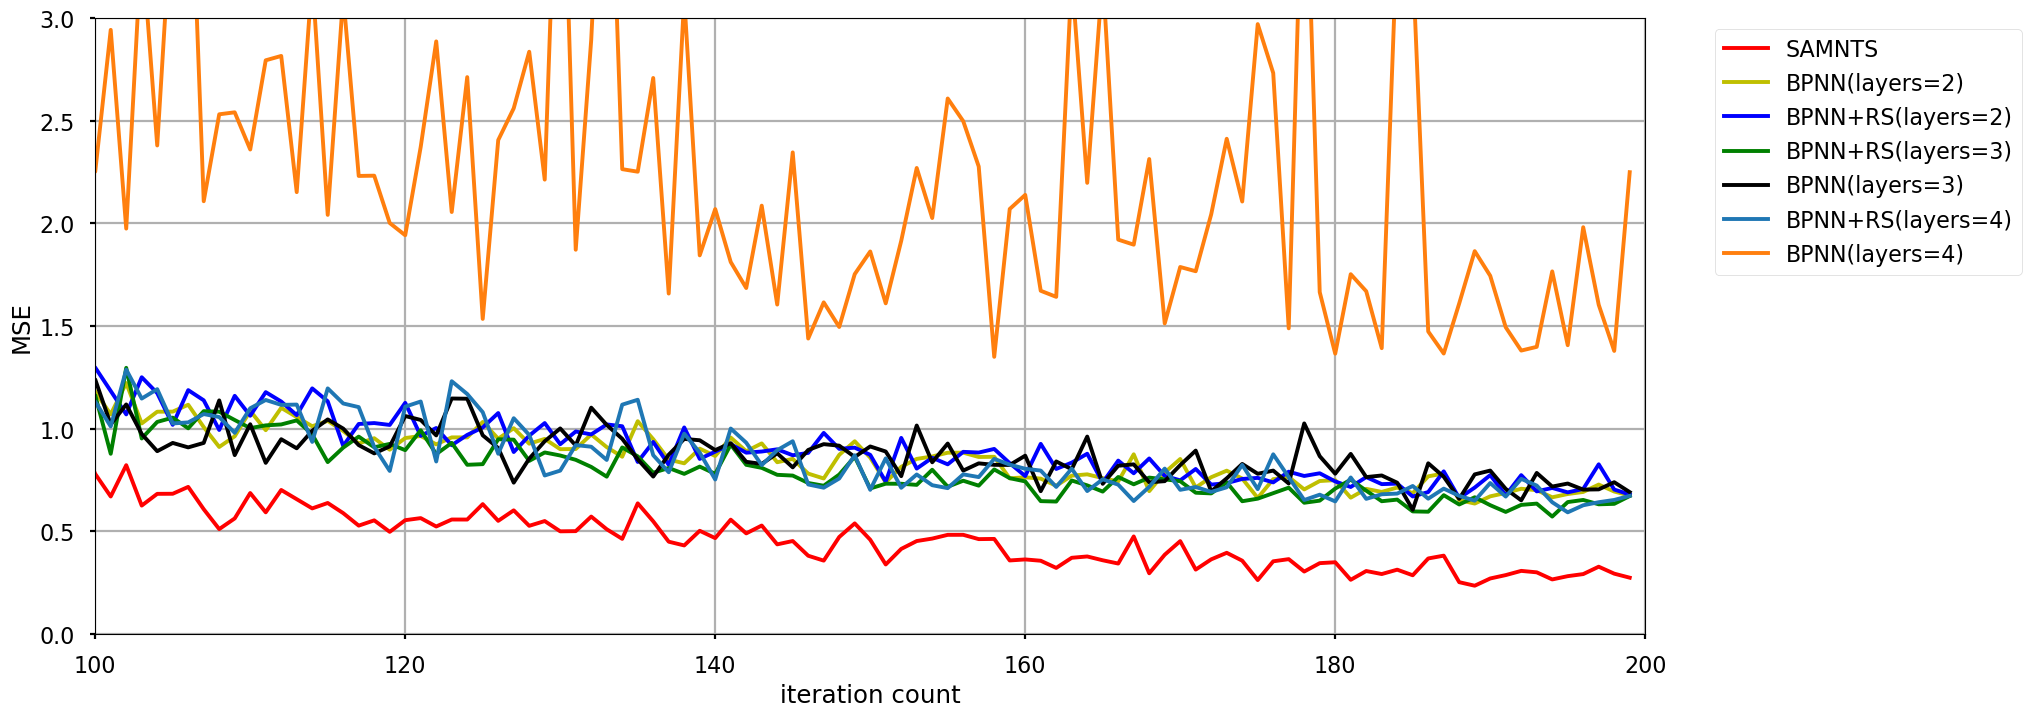

In [25]:
plt.figure(figsize=(20,8))
plt.style.use('seaborn-poster') 
plt.plot(np.arange(len(loss_bests)),[loss_bests[i].detach().numpy() for i in range(0,200)],label='SAMNTS',color ='r')
plt.plot(np.arange(len(loss_best)),[loss_best[i].detach().numpy() for i in range(0,200)],label='BPNN(layers=2)',color ='y')
plt.plot(np.arange(len(loss_best)),[loss_model2[i].detach().numpy() for i in range(0,200)],label='BPNN+RS(layers=2)',color ='b')
plt.plot(np.arange(len(loss_best)),[loss_model3[i].detach().numpy() for i in range(0,200)],label='BPNN+RS(layers=3)',color ='g')
plt.plot(np.arange(len(loss_model3c)),[loss_model3c[i].detach().numpy() for i in range(0,200)],label='BPNN(layers=3)',color ='black')
plt.plot(np.arange(len(loss_model3c)),[loss_model4[i].detach().numpy() for i in range(0,200)],label='BPNN+RS(layers=4)')
plt.plot(np.arange(len(loss_model3c)),[loss_model4c[i].detach().numpy() for i in range(0,200)],label='BPNN(layers=4)')
plt.ylim([0,3])
plt.xlim([100,200])
plt.xlabel("iteration count")
plt.ylabel("MSE")
plt.grid(True) 
plt.legend(loc = 'upper right',bbox_to_anchor=(1.25, 1.0))
plt.show()

# Comparison between the predicted results of the SAMNTS model and the actual results

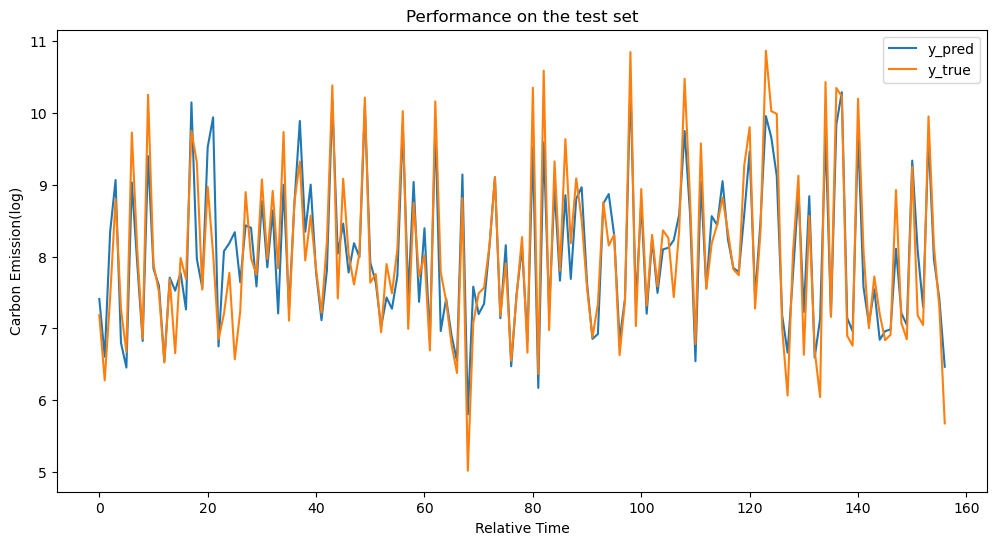

In [23]:
plt.figure(figsize=(12,6))
plt.title("Performance on the test set")
plt.xlabel("Relative Time")
plt.ylabel("Carbon Emission(log)")
plt.plot(np.arange(len(combined_output)),combined_output.numpy(),label='y_pred')
plt.plot(np.arange(len(Y_rel)),Y_rel,label='y_true')
plt.legend()
plt.show()